In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download behrad3d/nasa-cmaps
! unzip nasa-cmaps.zip

Dataset URL: https://www.kaggle.com/datasets/behrad3d/nasa-cmaps
License(s): CC0-1.0
 49% 6.00M/12.3M [00:00<00:00, 61.0MB/s]
100% 12.3M/12.3M [00:00<00:00, 97.6MB/s]
Archive:  nasa-cmaps.zip
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/readme.txt        
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import math
import xgboost
import time
from tqdm import tqdm
import keras.models
import keras.layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import shutil
import random
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import collections
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Tuning & Splitting Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Loading Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Liabraries
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [3]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [44]:
dftrain = pd.read_csv('/content/CMaps/train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('/content/CMaps/test_FD001 - Copy.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('/content/CMaps/RUL_FD001 - Copy.txt',sep='\s+',header=None,index_col=False,names=['RUL'])
dfvalid.shape

(192, 26)

In [45]:
train = dftrain.copy()
valid = dfvalid.copy()

In [29]:
train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [30]:
valid.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,10,1,-0.0017,-0.0000,100.0,518.67,642.07,1584.19,1403.69,14.62,...,522.13,2388.01,8145.46,8.4039,0.03,391,2388,100.0,38.75,23.3530
1,10,2,0.0061,-0.0001,100.0,518.67,642.32,1584.48,1388.37,14.62,...,522.59,2388.03,8146.38,8.3981,0.03,392,2388,100.0,39.08,23.4908
2,10,3,0.0027,-0.0003,100.0,518.67,641.77,1574.22,1400.07,14.62,...,522.22,2388.00,8141.22,8.3763,0.03,391,2388,100.0,39.31,23.4285
3,10,4,-0.0028,-0.0004,100.0,518.67,642.83,1583.90,1404.20,14.62,...,521.93,2387.97,8144.96,8.4250,0.03,392,2388,100.0,39.04,23.3622
4,10,5,0.0013,-0.0002,100.0,518.67,642.04,1585.22,1403.50,14.62,...,522.28,2388.00,8142.12,8.4127,0.03,391,2388,100.0,38.94,23.4059


In [31]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (20631, 26)
Shape of the validation dataset :  (192, 26)
Percentage of the validation dataset :  0.009220573404408587


In [32]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (20631, 26)
Shape of the validation dataset :  (192, 26)
Percentage of the validation dataset :  0.009220573404408587


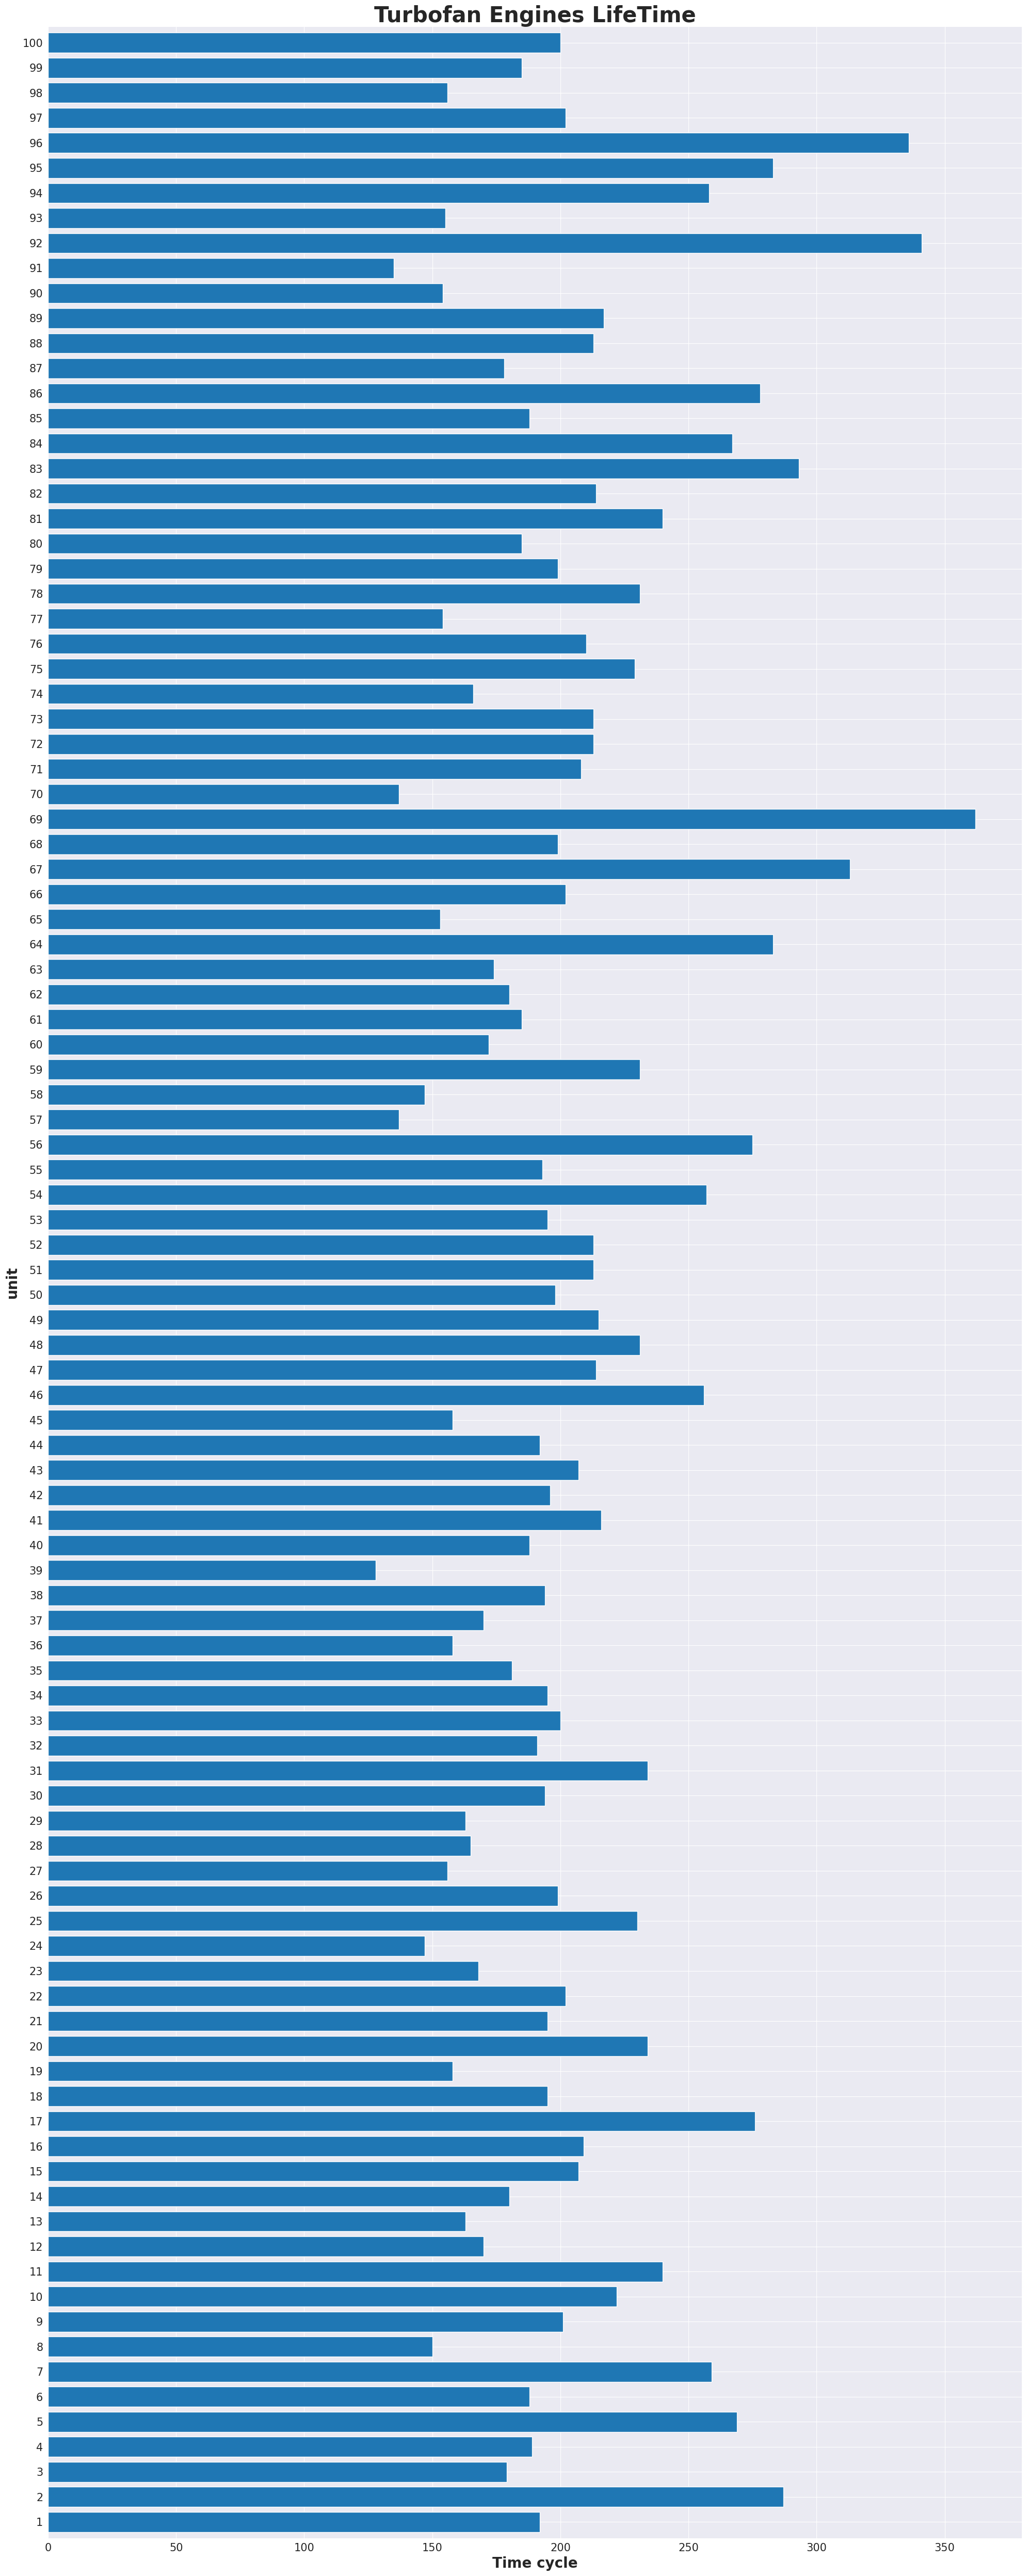

In [ ]:
max_time_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444459, 'max time cycle')

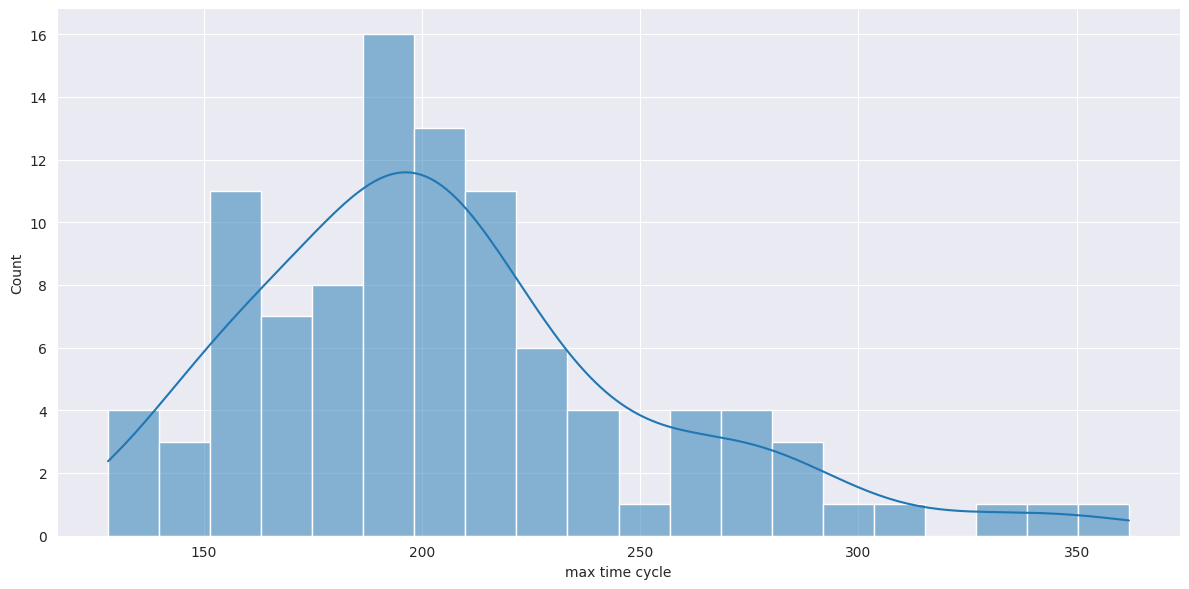

In [ ]:
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

In [46]:
#Add RUL column to the data
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number')
    max_time_cycles = train_grouped_by_unit['time_cycles'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [47]:
train = add_RUL_column(train)

In [48]:
train[['unit_number','RUL']]

,unit_number,RUL
0,1,191
1,1,190
2,1,189
3,1,188
4,1,187
...,...,...
20626,100,4
20627,100,3
20628,100,2
20629,100,1


In [49]:
#Rul analysis
maxrul_u = train.groupby('unit_number').max().reset_index()
maxrul_u.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,192,0.0047,0.0005,100.0,518.67,644.21,1605.44,1432.52,14.62,...,2388.35,8140.58,8.5227,0.03,398,2388,100.0,39.18,23.4999,191
1,2,287,0.0076,0.0006,100.0,518.67,643.94,1610.10,1431.17,14.62,...,2388.26,8175.57,8.5377,0.03,398,2388,100.0,39.24,23.6005,286
2,3,179,0.0058,0.0005,100.0,518.67,643.93,1606.50,1438.51,14.62,...,2388.20,8255.34,8.5363,0.03,399,2388,100.0,39.23,23.5181,178
3,4,189,0.0059,0.0006,100.0,518.67,644.53,1612.11,1434.12,14.62,...,2388.17,8259.42,8.5462,0.03,399,2388,100.0,39.21,23.5074,188
4,5,269,0.0055,0.0005,100.0,518.67,644.02,1609.41,1434.59,14.62,...,2388.23,8215.19,8.5410,0.03,398,2388,100.0,39.29,23.5503,268


<Axes: >

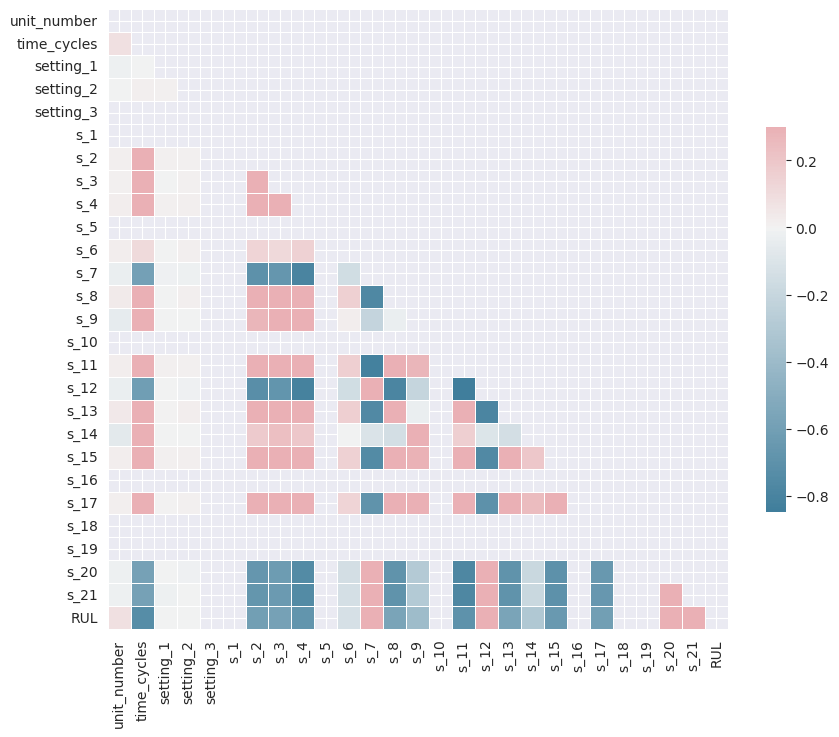

In [50]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

In [52]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()

In [ ]:
for i in range(1,22):
    try:
        plot_signal(train, Sensor_dictionary,'s_'+str(i))
    except:
        pass

Output hidden; open in https://colab.research.google.com to view.

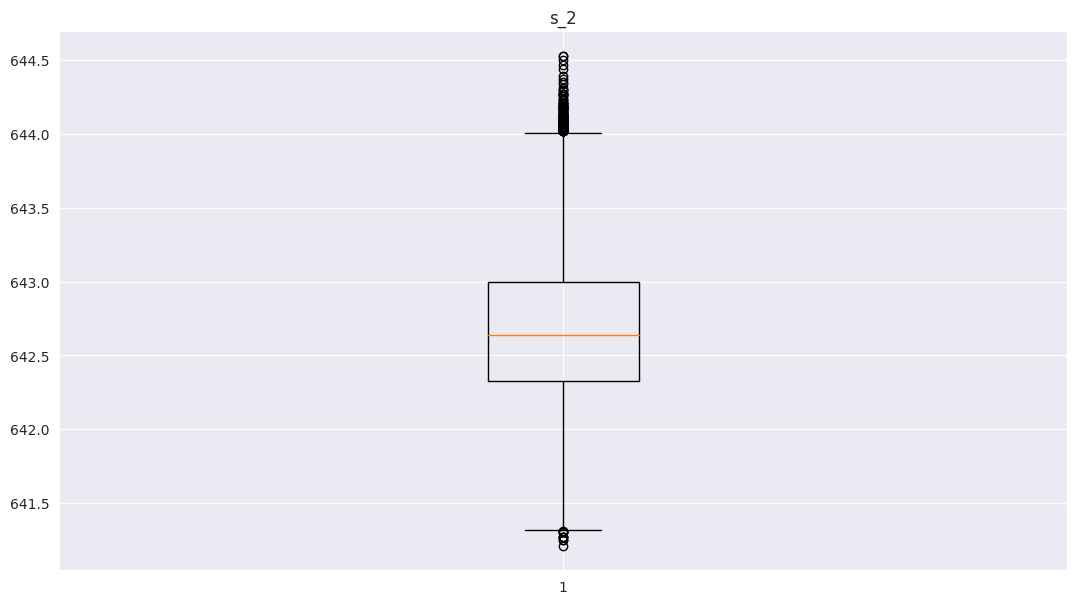

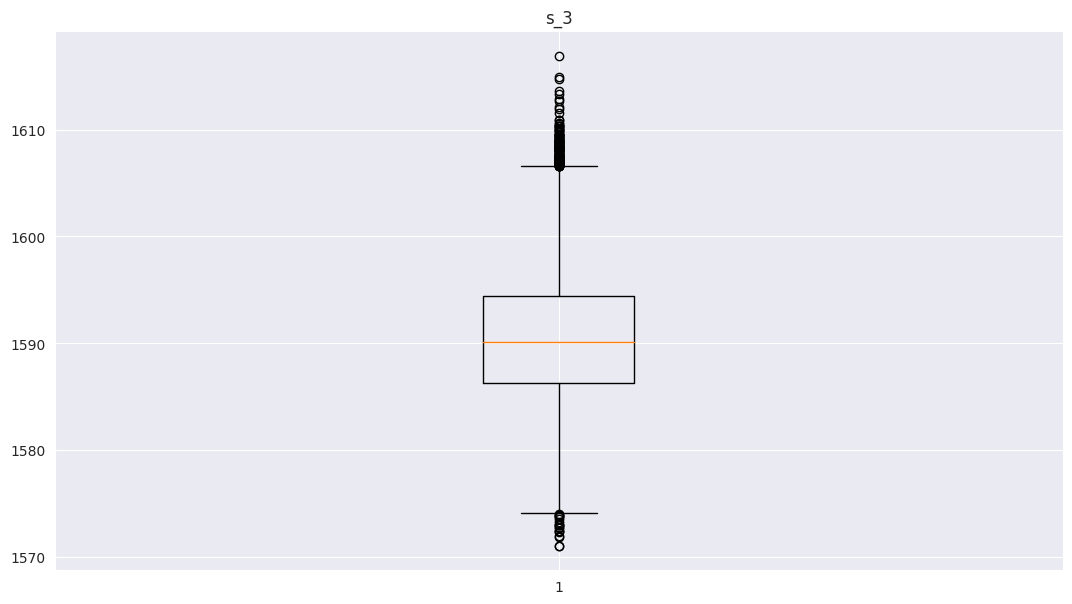

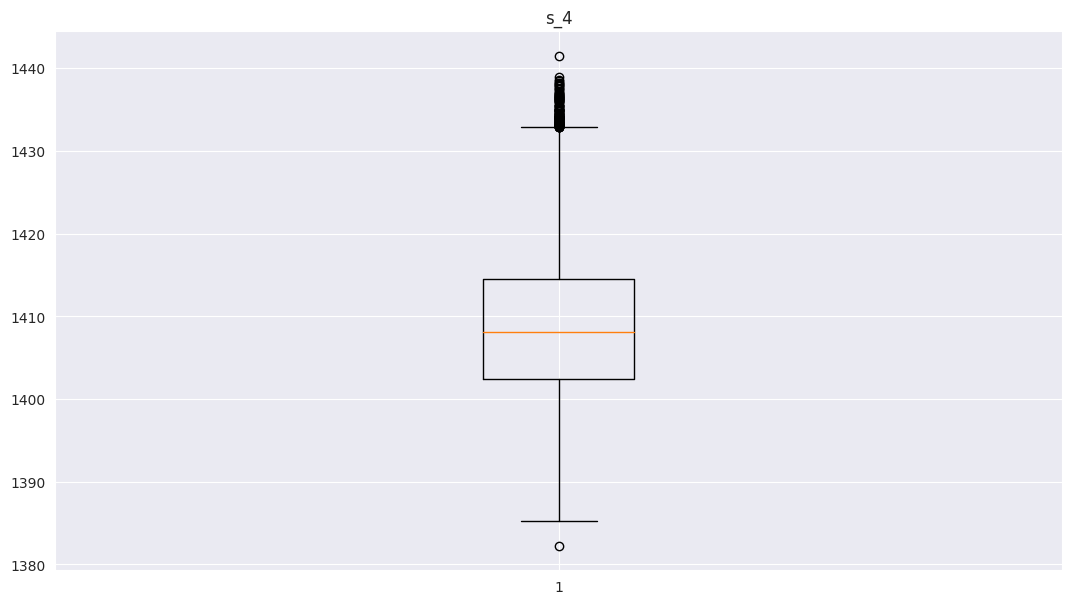

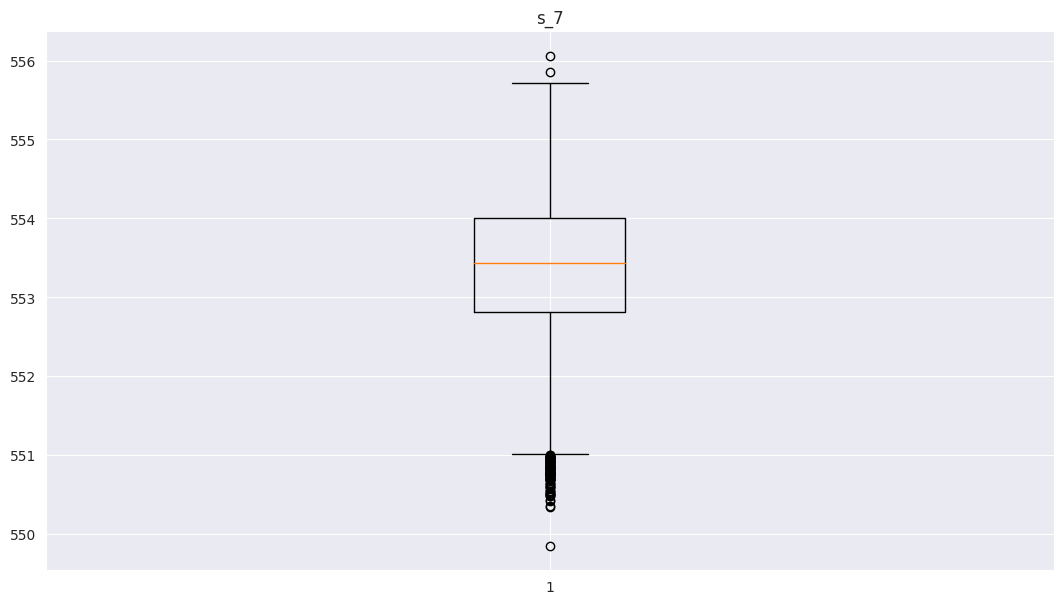

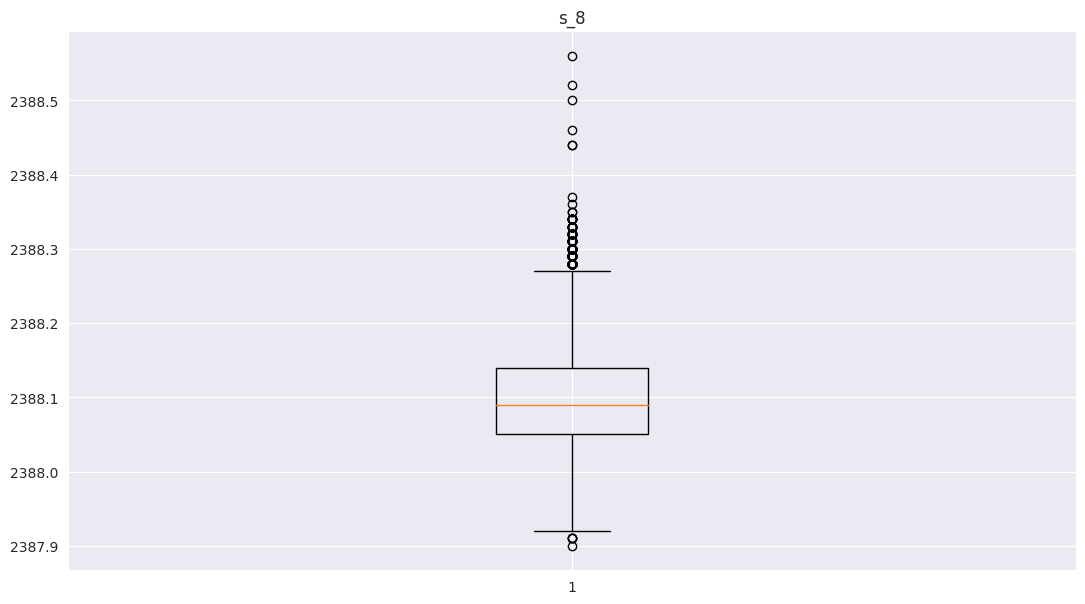

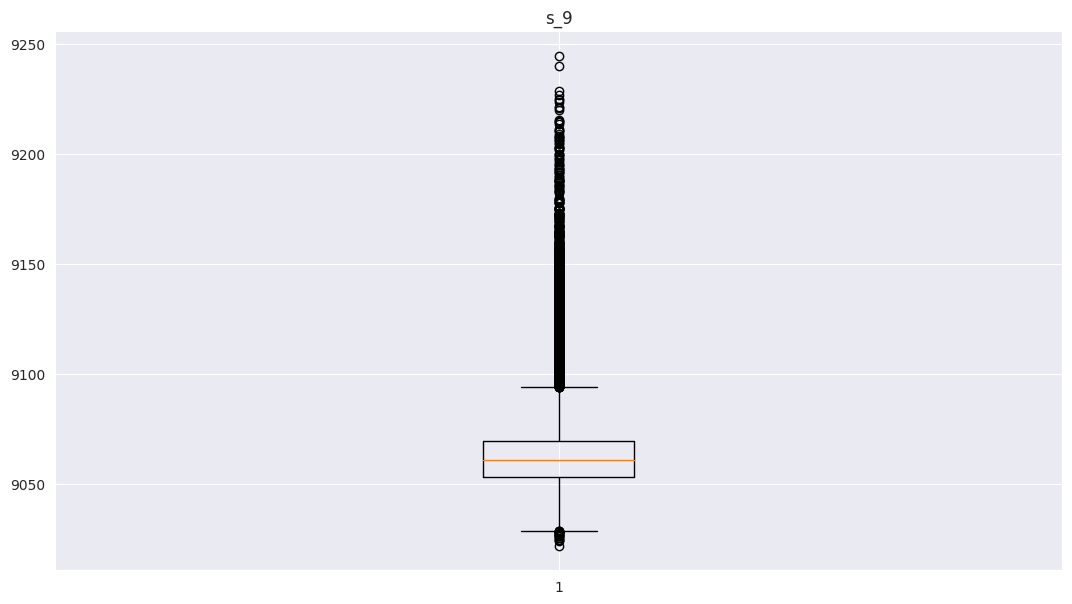

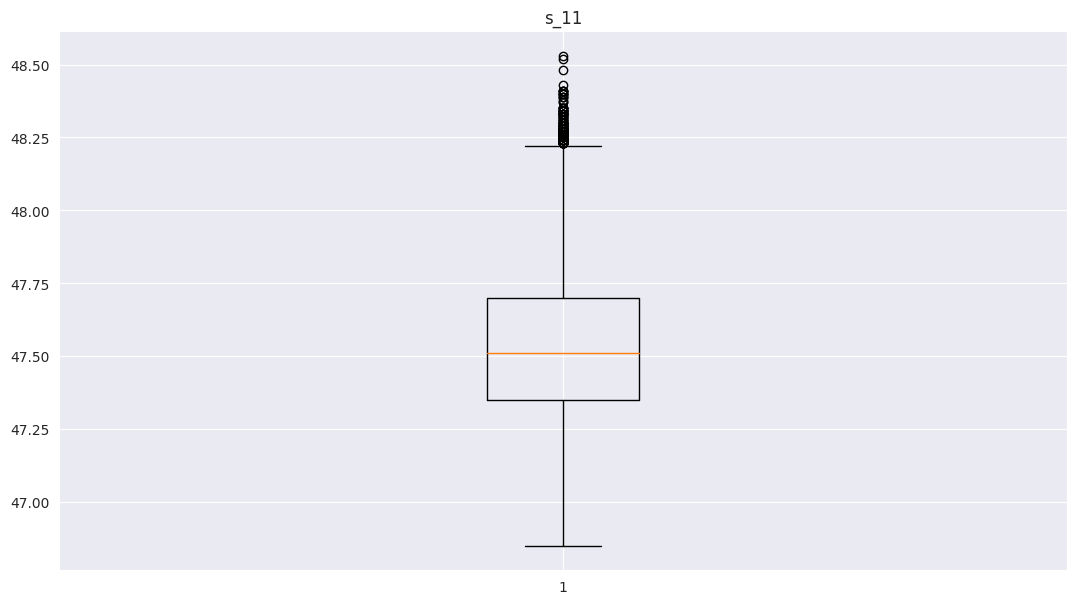

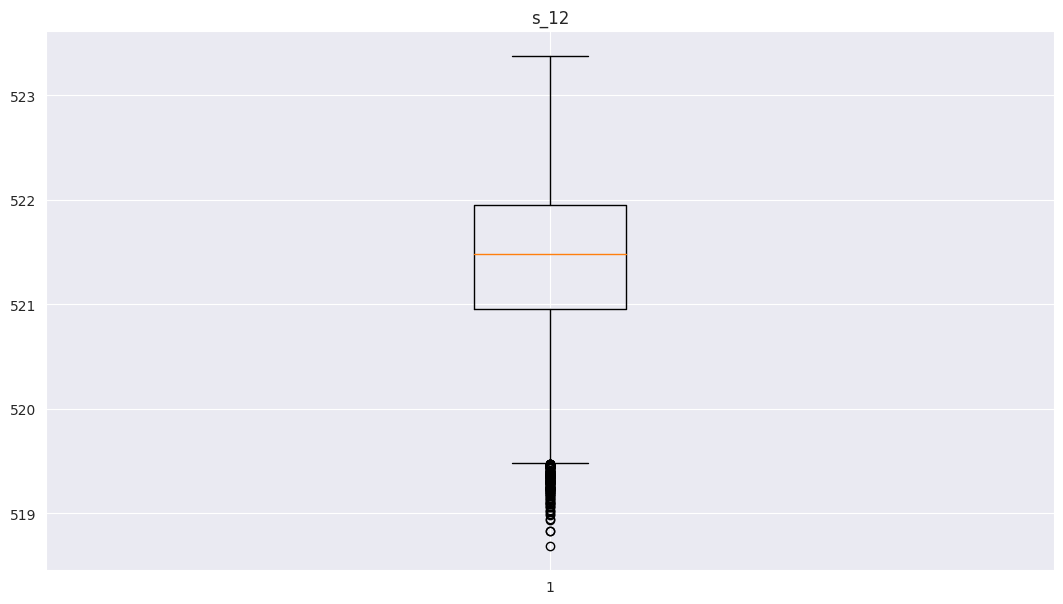

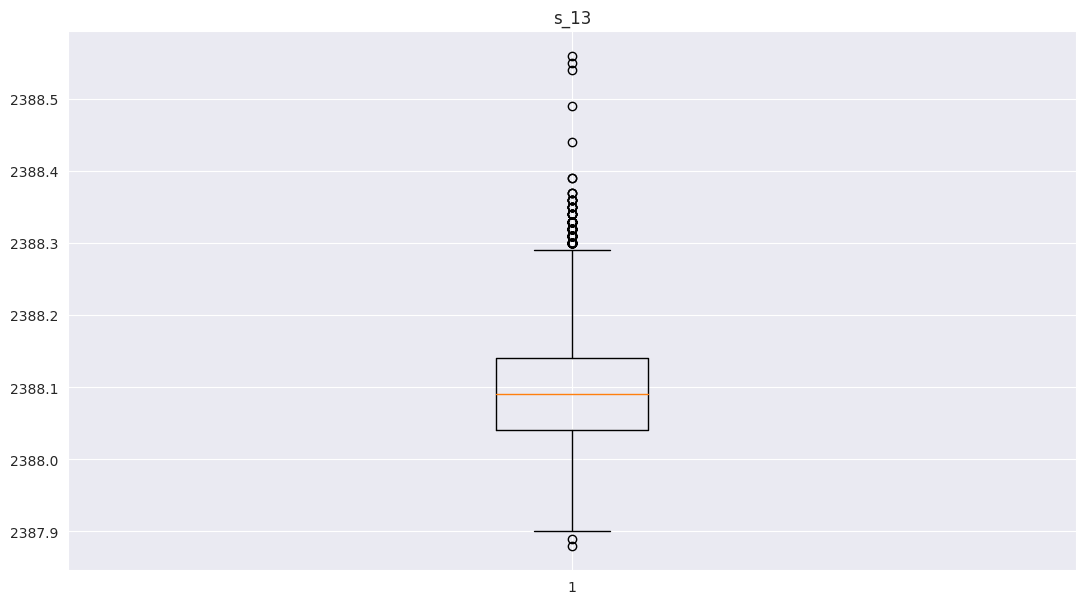

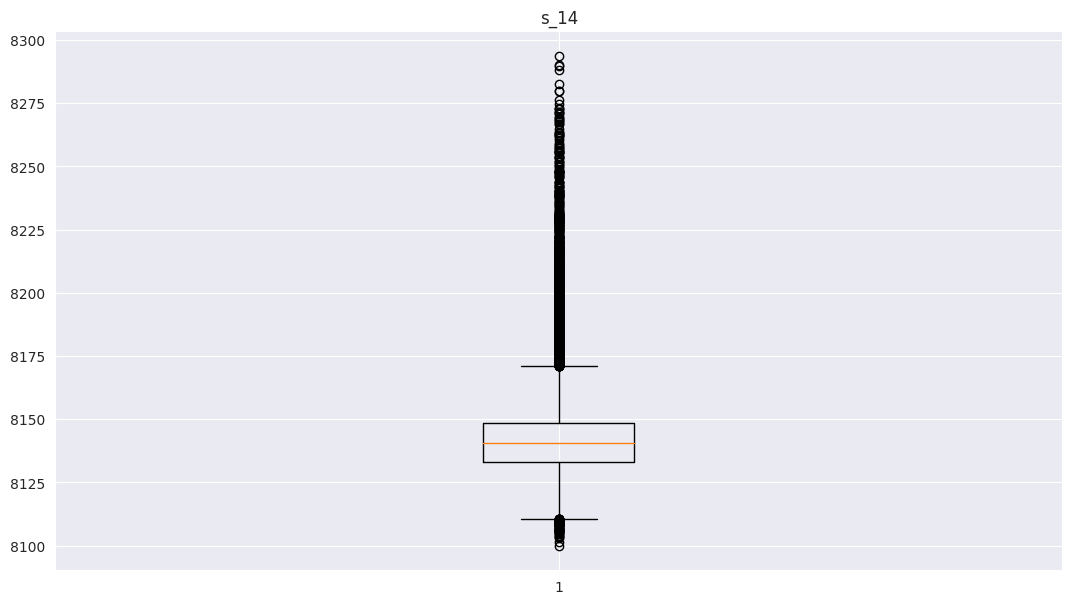

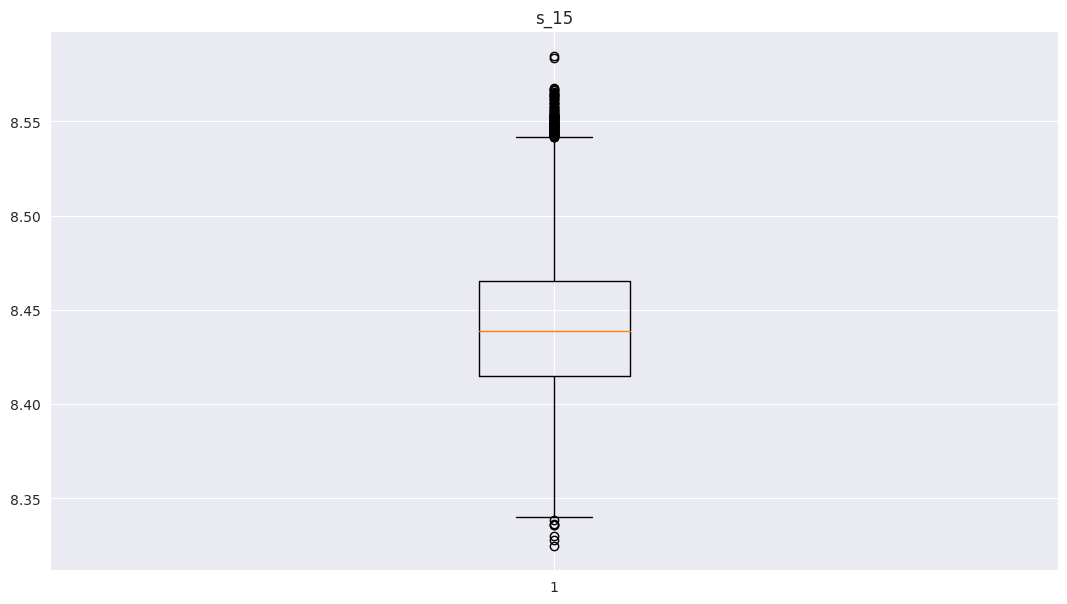

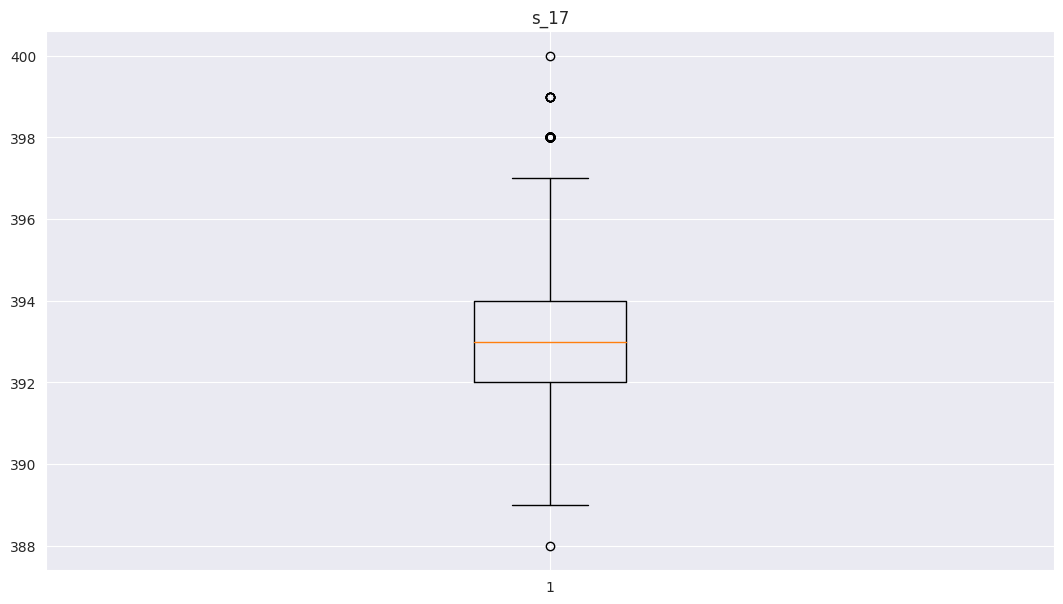

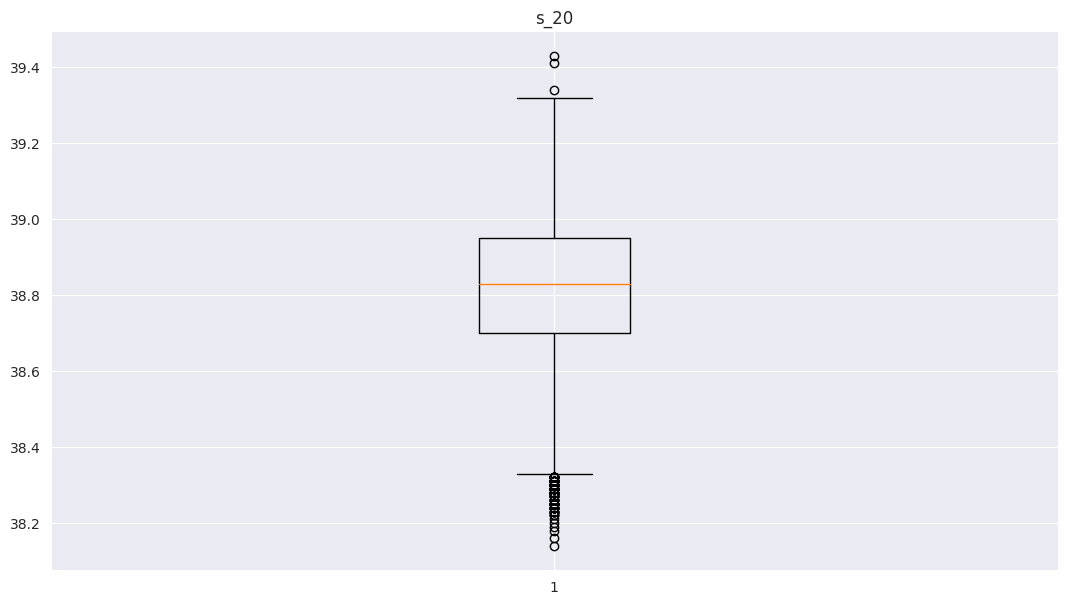

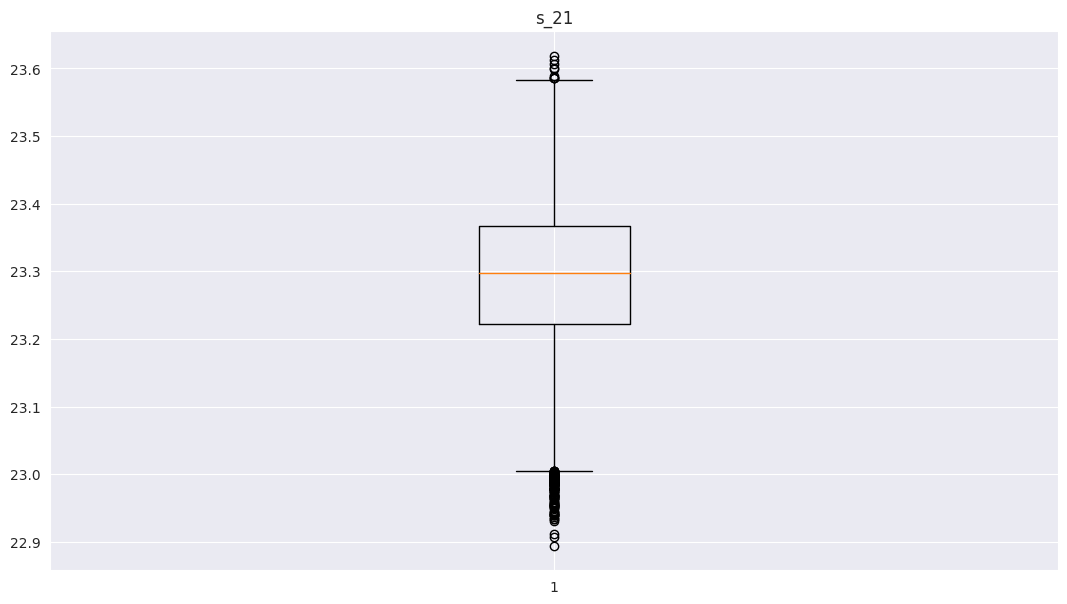

In [ ]:
for x in sensor_names:
    plt.figure(figsize=(13,7))
    plt.boxplot(train[x])
    plt.title(x)
    plt.show()

In [53]:
train.loc[:,'s_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


In [54]:
from sklearn.model_selection import train_test_split
drop_labels = index_names+setting_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [61]:
valid.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,10,1,-0.0017,-0.0000,100.0,518.67,642.07,1584.19,1403.69,14.62,...,522.13,2388.01,8145.46,8.4039,0.03,391,2388,100.0,38.75,23.3530
1,10,2,0.0061,-0.0001,100.0,518.67,642.32,1584.48,1388.37,14.62,...,522.59,2388.03,8146.38,8.3981,0.03,392,2388,100.0,39.08,23.4908
2,10,3,0.0027,-0.0003,100.0,518.67,641.77,1574.22,1400.07,14.62,...,522.22,2388.00,8141.22,8.3763,0.03,391,2388,100.0,39.31,23.4285
3,10,4,-0.0028,-0.0004,100.0,518.67,642.83,1583.90,1404.20,14.62,...,521.93,2387.97,8144.96,8.4250,0.03,392,2388,100.0,39.04,23.3622
4,10,5,0.0013,-0.0002,100.0,518.67,642.04,1585.22,1403.50,14.62,...,522.28,2388.00,8142.12,8.4127,0.03,391,2388,100.0,38.94,23.4059


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
#Conserve only the last occurence of each unit to match the length of y_valid
X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
#scaling X_valid
X_valid_s=X_valid

In [60]:
X_valid

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,518.67,643.0,1589.5,1398.99,14.62,21.61,552.88,2388.11,9060.88,1.3,...,521.82,2388.08,8141.91,8.4194,0.03,393,2388,100.0,38.79,23.2956


array([[<Axes: title={'center': 's_2'}>, <Axes: title={'center': 's_3'}>,
        <Axes: title={'center': 's_4'}>, <Axes: title={'center': 's_7'}>],
       [<Axes: title={'center': 's_8'}>, <Axes: title={'center': 's_9'}>,
        <Axes: title={'center': 's_11'}>,
        <Axes: title={'center': 's_12'}>],
       [<Axes: title={'center': 's_13'}>,
        <Axes: title={'center': 's_14'}>,
        <Axes: title={'center': 's_15'}>,
        <Axes: title={'center': 's_17'}>],
       [<Axes: title={'center': 's_20'}>,
        <Axes: title={'center': 's_21'}>, <Axes: >, <Axes: >]],
      dtype=object)

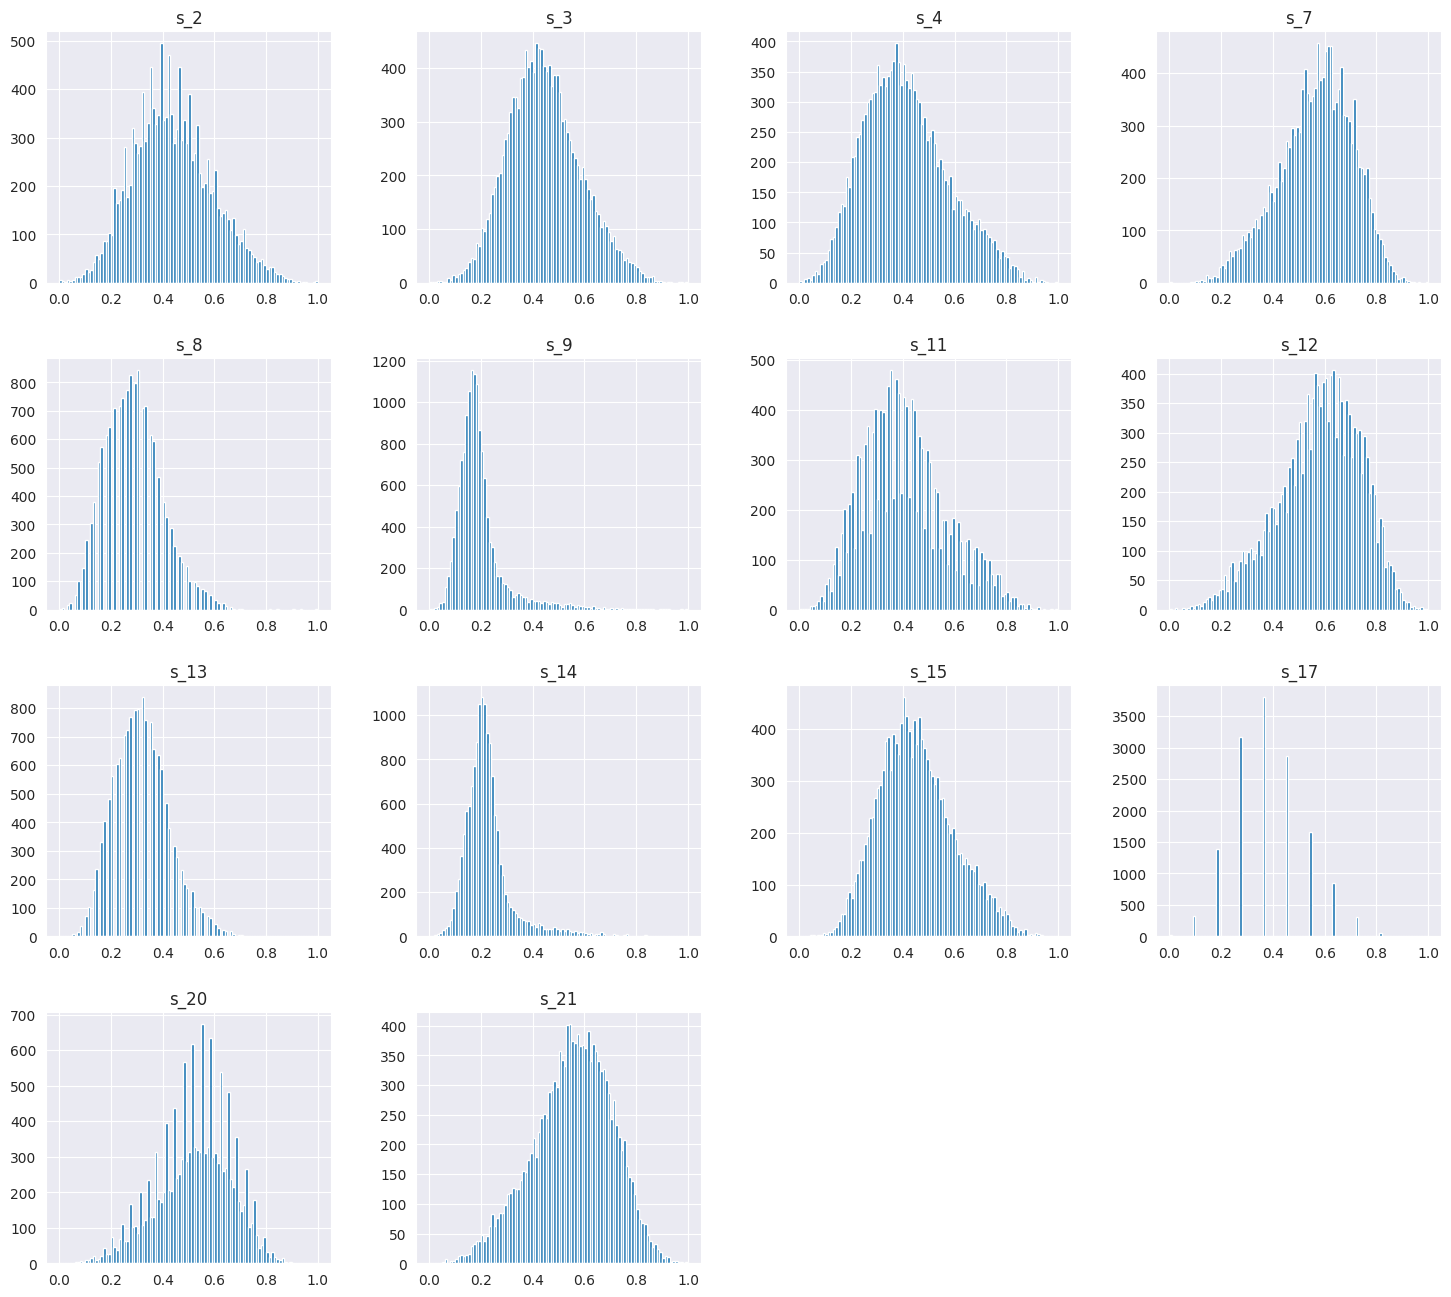

In [17]:
sensor_names=['s_{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]
pd.DataFrame(X_train_s,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(18,16))

#First Attempt With removing useless sensors



In [ ]:
#Linear regression
class Linear_Regression() :
    def __init__( self, lr=0.01, iterations=150 ) :
        self.lr = lr
        self.iterations = iterations
    def fit( self, X, Y ) :
        self.l, self.p = X.shape
        # weight initializer
        self.W = np.zeros( self.p )
        self.b = 0
        self.X = X
        self.Y = Y
        # gradientlearning
        for i in range( self.iterations ) :
            self.weight_updater()
        return self

    def weight_updater( self ) :
        Y_pred = self.predict( self.X )
        #  gradients
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.l
        db = - 2 * np.sum( self.Y - Y_pred ) / self.l
        # new weights assigned
        self.b = self.b - self.lr * db
        self.W = self.W - self.lr * dW
        return self

    def predict( self, X ) :
          # Y_pr=X.W+b
        return X.dot( self.W ) + self.b

In [ ]:
#SVR

from sklearn.svm import SVR
import tensorflow as tf
regressor = SVR(kernel='rbf')

In [57]:
# Random forest

rf = RandomForestRegressor(max_features="sqrt", random_state=42)

In [19]:
#Defining evaluation functions

#R2 score & RMSE & MAER
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [20]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

In [ ]:
# 1st attempt (all features, without historical data)

lr=Linear_Regression() #Instantiation
lr.fit(X=X_train_s, Y=y_train) #Fitting

y_lr_train = lr.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_s)  #Prediction on test data
evaluate(y_test, y_lr_test, label='test')

y_lr_valid= lr.predict(X_valid_s) #Prediction on validation data
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:56.19869318681088, R2:0.3439361345919162
test set RMSE:54.264009074691856, R2:0.35713062175493715
valid set RMSE:68.46516842523266, R2:nan


In [ ]:
#SVM

regressor.fit(X_train_s, y_train) # fitting

y_svr_train = regressor.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_s) #Prediction on test data
evaluate(y_test, y_svr_test, label='test')

y_svr_valid= lr.predict(X_valid_s)  #Prediction on validation data
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:43.56448464126648, R2:0.605761670162996
test set RMSE:47.26718449996112, R2:0.5122262167433573
valid set RMSE:34.84962228223509, R2:0.2967064952591344


In [58]:
#Random Forest Regressor

# gridsearch goes here
rf.fit(X_train_s, y_train)
# predict and evaluate
y_rf_train = rf.predict(X_train_s)
evaluate(y_train,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_rf_valid, label='valid')
print (y_rf_valid)

train set RMSE:15.408303170220156, R2:0.9506822432050425
test set RMSE:44.36383009860364, R2:0.5703082128383993
valid set RMSE:53.69, R2:nan
[42.31]


In [59]:
X_valid_s

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,518.67,643.0,1589.5,1398.99,14.62,21.61,552.88,2388.11,9060.88,1.3,...,521.82,2388.08,8141.91,8.4194,0.03,393,2388,100.0,38.79,23.2956


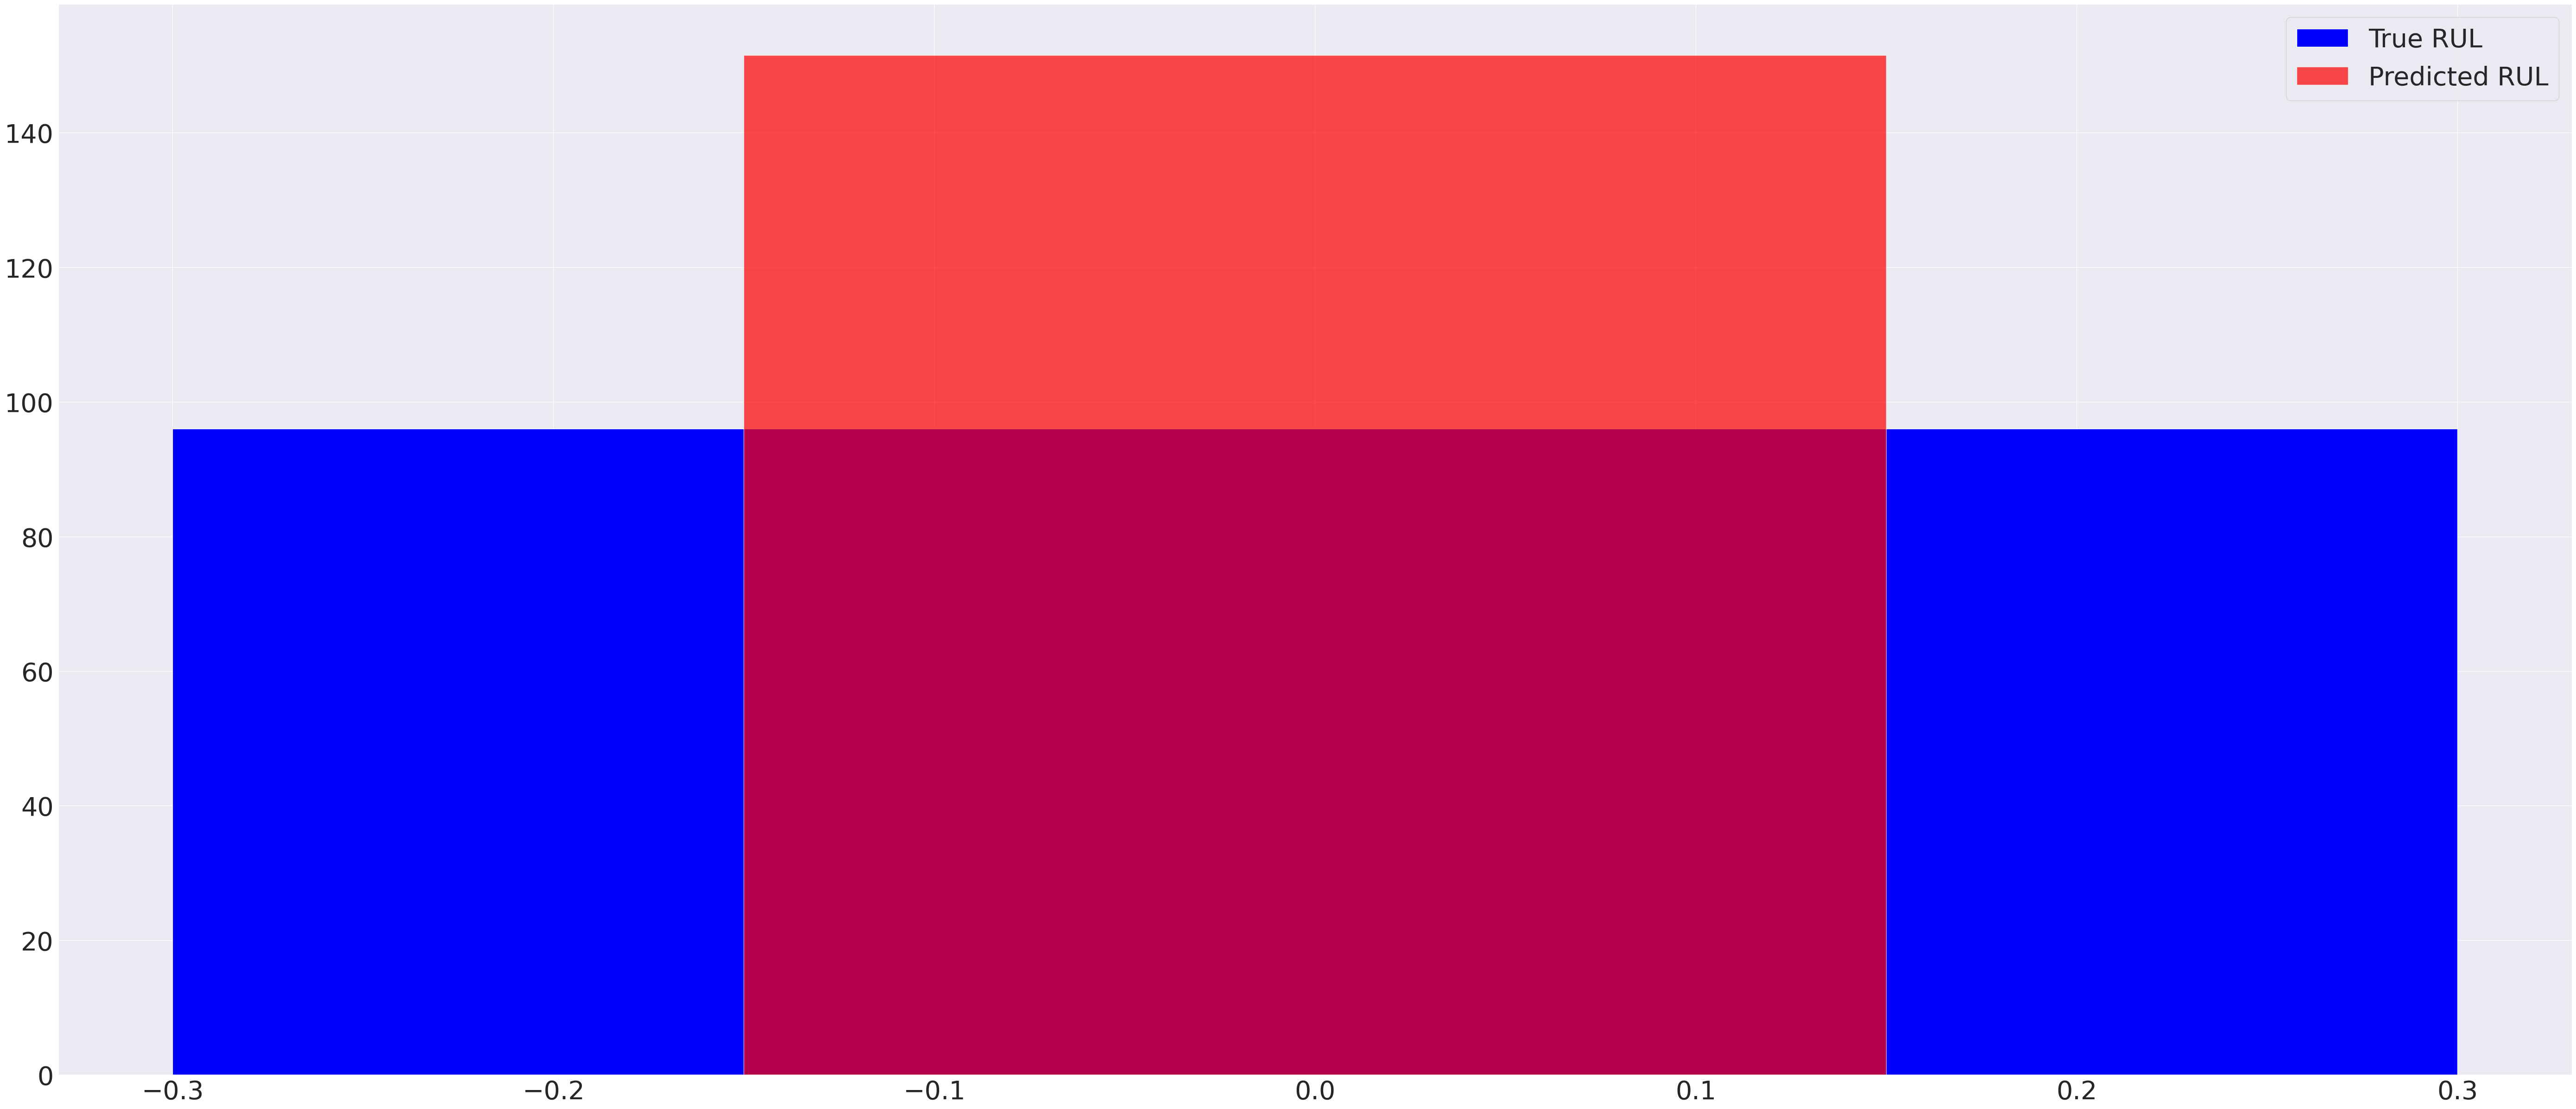

In [ ]:
plot_predActual(y_valid, y_rf_valid)

#Second Attempt Without Useless Sensors
#### In this section we drop constant signals, and we noticed in the max_time_cycles plot that in most of the time the maximum value is in the interval [190,210], hence we will set the maximum RUL to 195 through RUL clipping, Considering that every RUL higher than 195 is equivalent to 195 will help in the prediction process as it reduces some overhead without affecting the main objective as 195 is already a high RUL.

In [22]:
print('maximum of y_train : ',y_train.max())
print('maximum of y_test : ',y_test.max())
print('maximum of y_valid : ',y_valid.max())

maximum of y_train :  361
maximum of y_test :  360
maximum of y_valid :  RUL    96
dtype: int64


In [ ]:
#I notice that the model overestimates the RUL

(array([1023., 1066., 1083., 1120.,  937.,  557.,  237.,  117.,   35.,
          15.]),
 array([  0.,  36.,  72., 108., 144., 180., 216., 252., 288., 324., 360.]),
 <BarContainer object of 10 artists>)

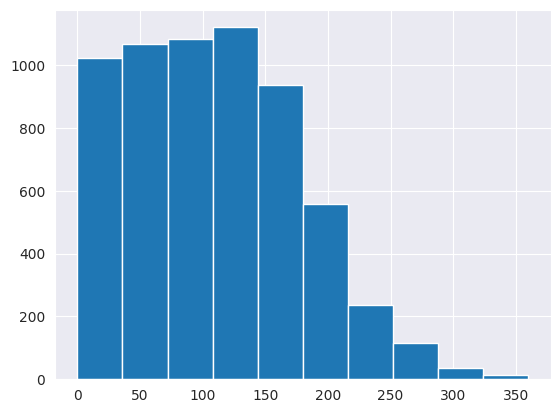

In [23]:
plt.hist(y_test)

In [24]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_18', 's_19']
X_train_2=X_train.drop(columns=drop_labels2, axis=1) # drop the constant columns from the train dataset
X_test_2=X_test.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the test dataset
X_train_2_s=scaler.fit_transform(X_train_2) #scaling X_train_2
X_test_2_s=scaler.fit_transform(X_test_2) #scaling X_test_2
y_train_clip=y_train.clip(upper=195)  #Clipping y_train to have 195 as the maximum value
X_valid_2=X_valid.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the validation dataset
X_valid_2_s=scaler.fit_transform(X_valid_2) #scaling X_valid_2

In [26]:
X_valid_2_s

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#Linear Regression

lr=Linear_Regression()
lr.fit(X=X_train_2_s, Y=y_train_clip)

y_lr_train = lr.predict(X_train_2_s)
evaluate(y_train_clip,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_2_s)
evaluate(y_test, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_2_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:47.86312955545103, R2:0.3792662465007206
test set RMSE:55.6261002397046, R2:0.3244519972933424
valid set RMSE:34.21070108960351, R2:0.3222579927041398


In [ ]:
#SVR
regressor.fit(X_train_2_s, y_train)

y_svr_train = regressor.predict(X_train_2_s)
evaluate(y_train_clip,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_2_s)
evaluate(y_test, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_2_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:32.91543148706822, R2:0.7064363470171213
test set RMSE:48.75516379159361, R2:0.48103242301470384
valid set RMSE:25.947912225366206, R2:0.6101071274546097


In [ ]:
#Random Forest

rf.fit(X_train_2_s, y_train_clip)
# predict and evaluate
y_rf_train = rf.predict(X_train_2_s)
evaluate(y_train_clip,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_2_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_2_s)
evaluate(y_valid, y_rf_valid, label='valid')

train set RMSE:12.036862499525814, R2:0.9607418547981479
test set RMSE:45.81838291793876, R2:0.5416697719315231
valid set RMSE:27.739999999999995, R2:nan


In [ ]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=110, learning_rate=0.02, gamma=0, subsample=0.8,colsample_bytree=0.5, max_depth=3)
xgb.fit(X_train_2_s, y_train_clip)


y_xgb_train = xgb.predict(X_train_2_s)
evaluate(y_train_clip,y_xgb_train, label='train')

y_xgb_test = xgb.predict(X_test_2_s)
evaluate(y_test, y_xgb_test, label='test')

y_xgb_valid = xgb.predict(X_valid_2_s)
evaluate(y_valid, y_xgb_valid, label='valid')

train set RMSE:33.974204905046676, R2:0.6872467858903476
test set RMSE:45.561759549779694, R2:0.5467895014553633
valid set RMSE:29.291534423828125, R2:nan


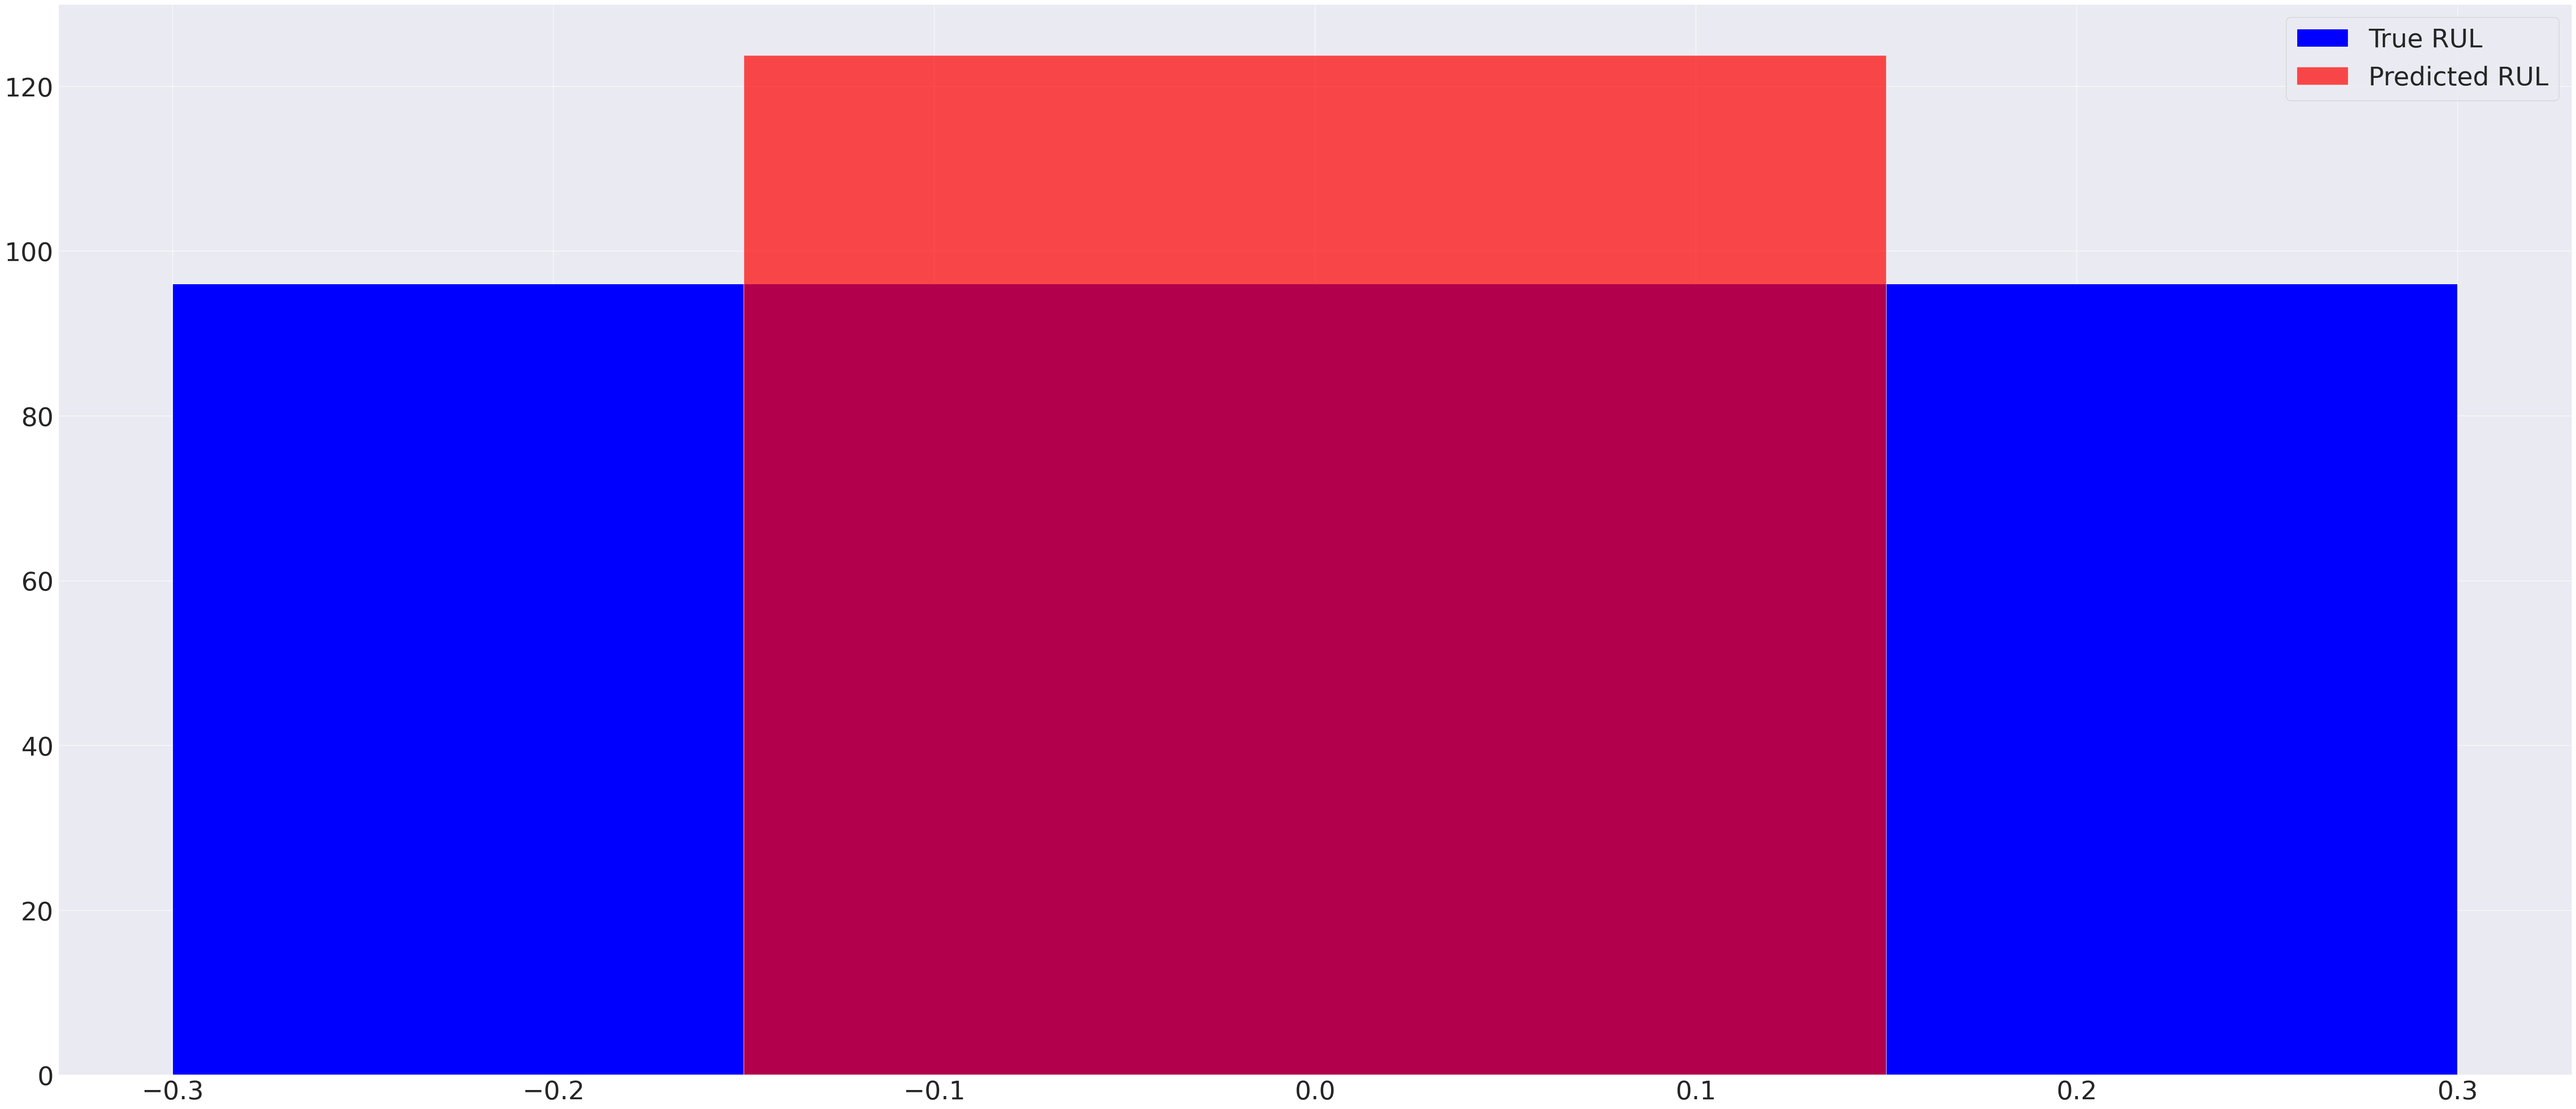

In [ ]:
plot_predActual(y_valid, y_rf_valid)

# Third Attempt
#### In this section we are trying to discover a time series pattern in our features as we add to our data a new feature called 'rolling mean feature'. It's a equivalent to the mean value of a feature considering 10 time cycles. It will be computed for every feature.

In [ ]:
df=train.copy()
for x in X_train_2.columns:
    df[x+'_rm']=0


df.columns

Index(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3',
       's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21', 'RUL', 's_2_rm', 's_3_rm', 's_4_rm', 's_7_rm', 's_8_rm',
       's_9_rm', 's_11_rm', 's_12_rm', 's_13_rm', 's_14_rm', 's_15_rm',
       's_17_rm', 's_20_rm', 's_21_rm'],
      dtype='object')

In [ ]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_18', 's_19']
df=df.drop(columns=setting_names+drop_labels2+['RUL'], axis=1)

X_valid_3=valid.drop(columns=index_names+setting_names+drop_labels2, axis=1)

In [ ]:
def update_rolling_mean(data, mask):
    for x, group in mask.groupby("unit_number"):
        for x in X_train_2.columns:
            data.loc[group.index[10:], x+"_rm"] = data.loc[group.index, x].rolling(10).mean()[10:]
            data.loc[group.index[:10], x+"_rm"] = data.loc[group.index[:10], x]

update_rolling_mean(df, df)
update_rolling_mean(X_valid_3, valid)

X_valid_3=X_valid_3.fillna(0)

In [ ]:
df.iloc[-1,-14:]=df.iloc[-2,-14:]
X_valid_3.iloc[-1,-14:]=X_valid_3.iloc[-2,-14:]

In [ ]:
train_tm=df

In [ ]:
train_tm=train_tm.drop(columns=index_names, axis=1)

In [ ]:
X_train_tm, X_test_tm, y_train_tm, y_test_tm=train_test_split(train_tm,train['RUL'].clip(upper=195), test_size=0.35, random_state=42)
X_train_tm_s=scaler.fit_transform(X_train_tm)
X_test_tm_s=scaler.fit_transform(X_test_tm)
X_val3=pd.concat([valid['unit_number'],X_valid_3],axis=1)
X_valid3 = X_val3.groupby('unit_number').last().reset_index().drop(columns=['unit_number'])
X_valid_s=scaler.fit_transform(X_valid3)

In [ ]:
#Linear Regression

lr=Linear_Regression()
lr.fit(X_train_tm_s, y_train_tm)

y_lr_train = lr.predict(X_train_tm_s)
evaluate(y_train_tm,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_tm_s)
evaluate(y_test_tm, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:40.529140113375824, R2:0.5544980153774888
test set RMSE:40.0989396737232, R2:0.5545324354987834
valid set RMSE:38.39141884713507, R2:0.14648967061777096


In [ ]:
regressor.fit(X_train_tm_s, y_train_tm)

y_svr_train = regressor.predict(X_train_tm_s)
evaluate(y_train_tm,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_tm_s)
evaluate(y_test_tm, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:32.48452364307428, R2:0.7138011601047023
test set RMSE:33.82872041899003, R2:0.6829546036019843
valid set RMSE:26.590317383722343, R2:0.5905626119267564


In [ ]:
#Random forest

rf = RandomForestRegressor(max_features="sqrt", random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:9.787255139684294, R2:0.9740201473464815
test set RMSE:29.95828541820653, R2:0.7513524307207359
valid set RMSE:62.08000000000001, R2:nan


In [ ]:
# Performing Grid search

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = {
    'n_estimators': [50,90,120],
    'max_depth' : [8,9,10],
}

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=3)

grid.fit(X_train_tm_s, y_train_tm)

print(grid.best_score_ , grid.best_params_)
#max_features=5,

0.7865819907711837 {'max_depth': 10, 'n_estimators': 90}


In [ ]:
rf=RandomForestRegressor(n_estimators=90,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:23.867485497289408, R2:0.8455001014801531
test set RMSE:30.15571767644218, R2:0.748064337874458
valid set RMSE:71.17498369890862, R2:nan


In [ ]:
# Params found using Bayesian Optimisation
xgb = xgboost.XGBRegressor(n_estimators=50,
                           max_depth=6,
                           learning_rate=0.1,
                           reg_lambda=0.02,
                           gamma=0.4,
                           random_state=42)
xgb.fit(X_train_tm_s, y_train_tm)

# predict and evaluate
y_hat_train = xgb.predict(X_train_tm_s)
evaluate(y_train_tm, y_hat_train, 'train')

y_hat_test = xgb.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test)

y_hat_valid = xgb.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:24.44225850465359, R2:0.8379692173705675
test set RMSE:30.450946292934663, R2:0.7431072212034071
valid set RMSE:36.25396400409453, R2:0.23888294402184052


In [ ]:
from sklearn.model_selection import KFold
train_tm_cv=train_tm.copy()
y=train['RUL'].clip(upper=195)
scores_train=[]
scores_test=[]
scores_validation=[]

cv = KFold(n_splits=4, shuffle=True)
for train_index, test_index in cv.split(train_tm) :
    print("Index du train : ", train_index, "\n")
    print("Index de test : ", test_index)
    X_train, X_test, y_train, y_test = train_tm.iloc[train_index,:], train_tm.iloc[test_index,:],y[train_index], y[test_index]
    regressor.fit(scaler.fit_transform(X_train), y_train)
    y_hat_train = regressor.predict(scaler.fit_transform(X_train))
    evaluate(y_train,y_hat_train, label='train')
    y_hat_test = regressor.predict(scaler.fit_transform(X_test))
    evaluate(y_test, y_hat_test, label='test')
    y_hat_valid = regressor.predict(scaler.fit_transform(X_valid3))
    evaluate(y_valid, y_hat_valid, label='valid')


Index du train :  [    0     1     2 ... 20628 20629 20630] 

Index de test :  [    4     6     8 ... 20611 20615 20625]
train set RMSE:32.49687359906522, R2:0.7116289227935093
test set RMSE:32.493781013218545, R2:0.7110055673383389
valid set RMSE:27.689283640034333, R2:0.5560194999678765
Index du train :  [    1     2     3 ... 20628 20629 20630] 

Index de test :  [    0     7     9 ... 20620 20622 20627]
train set RMSE:32.34840471860422, R2:0.7138289768429971
test set RMSE:32.97829395834572, R2:0.7035595458292802
valid set RMSE:27.668648696844684, R2:0.5566809904410818
Index du train :  [    0     1     2 ... 20628 20629 20630] 

Index de test :  [    3     5    10 ... 20623 20624 20626]
train set RMSE:32.46821119033224, R2:0.7134634118010157
test set RMSE:32.56920407819318, R2:0.7055759767955598
valid set RMSE:27.99351581966008, R2:0.5462095528547383
Index du train :  [    0     3     4 ... 20625 20626 20627] 

Index de test :  [    1     2    13 ... 20628 20629 20630]
train set RM

<BarContainer object of 28 artists>

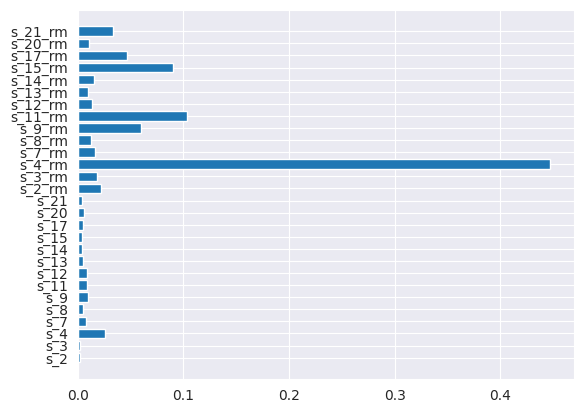

In [ ]:
#BEST FEATURE FOR XGB MODEL
xgb.fit(X_train_tm_s, y_train_tm)
plt.barh(train_tm.columns, xgb.feature_importances_)

<BarContainer object of 28 artists>

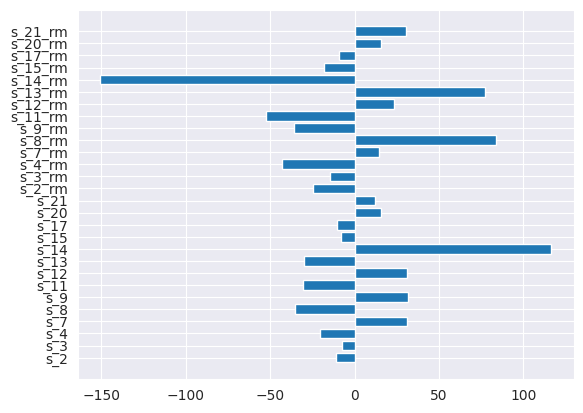

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X_train_tm_s, y=y_train_tm)
plt.barh(X_train_tm.columns, model.coef_)

<BarContainer object of 28 artists>

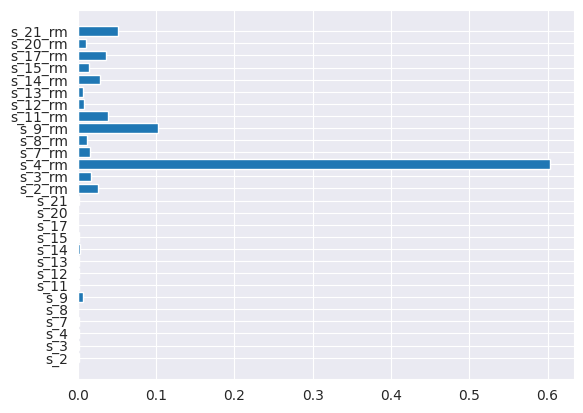

In [ ]:
#BEST FEATURE FOR RF MODEL
rf.fit(X_train_tm_s, y_train_tm)
plt.barh(train_tm.columns, rf.feature_importances_)

In [ ]:
dftm= pd.concat([train['unit_number'],train_tm,train['RUL']],axis=1)

dftm

,unit_number,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,...,s_9_rm,s_11_rm,s_12_rm,s_13_rm,s_14_rm,s_15_rm,s_17_rm,s_20_rm,s_21_rm,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,...,9046.190,47.470,521.660,2388.020,8138.620,8.41950,392.0,39.060,23.41900,191
1,1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,...,9044.070,47.490,522.280,2388.070,8131.490,8.43180,392.0,39.000,23.42360,190
2,1,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,...,9052.940,47.270,522.420,2388.030,8133.230,8.41780,390.0,38.950,23.34420,189
3,1,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,...,9049.480,47.130,522.860,2388.080,8133.830,8.36820,392.0,38.880,23.37390,188
4,1,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,...,9055.150,47.280,522.190,2388.040,8133.800,8.42940,393.0,38.900,23.40440,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,...,9066.903,48.116,519.840,2388.237,8141.170,8.51031,396.0,38.453,23.09254,4
20627,100,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,...,9066.820,48.116,519.793,2388.237,8140.771,8.51083,395.9,38.416,23.08540,3
20628,100,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,...,9066.642,48.096,519.796,2388.240,8140.882,8.51915,396.2,38.424,23.07321,2
20629,100,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,...,9067.045,48.136,519.813,2388.239,8140.833,8.52434,396.0,38.388,23.07370,1


# New Features

In [ ]:
def plot_signal(df, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(8).mean())

    plt.ylabel(signal_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

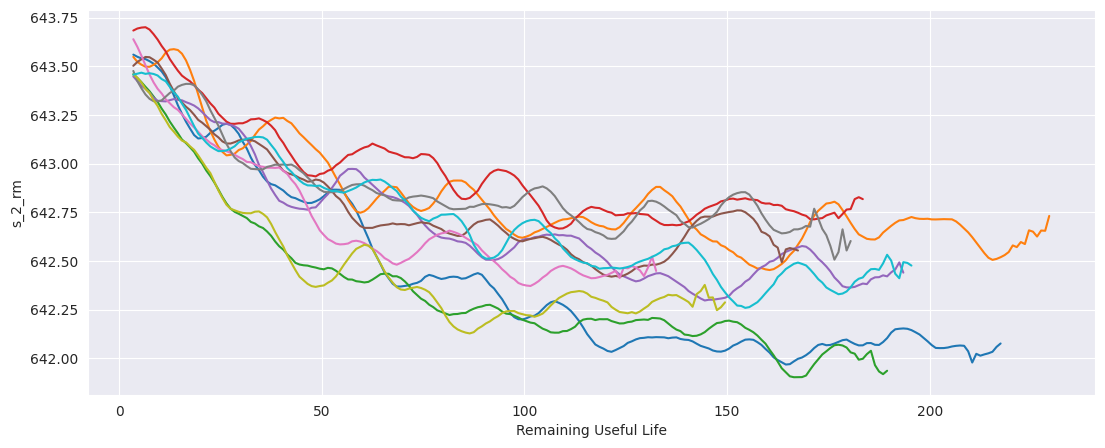

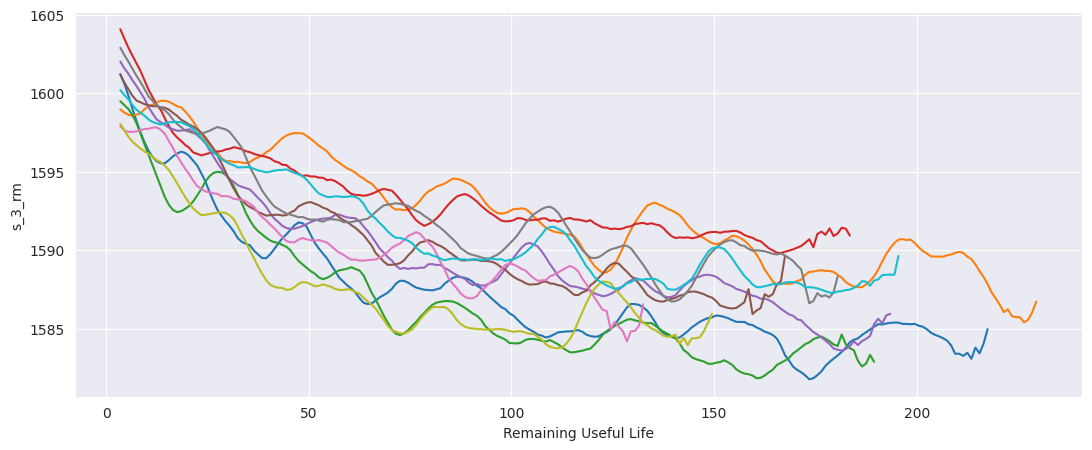

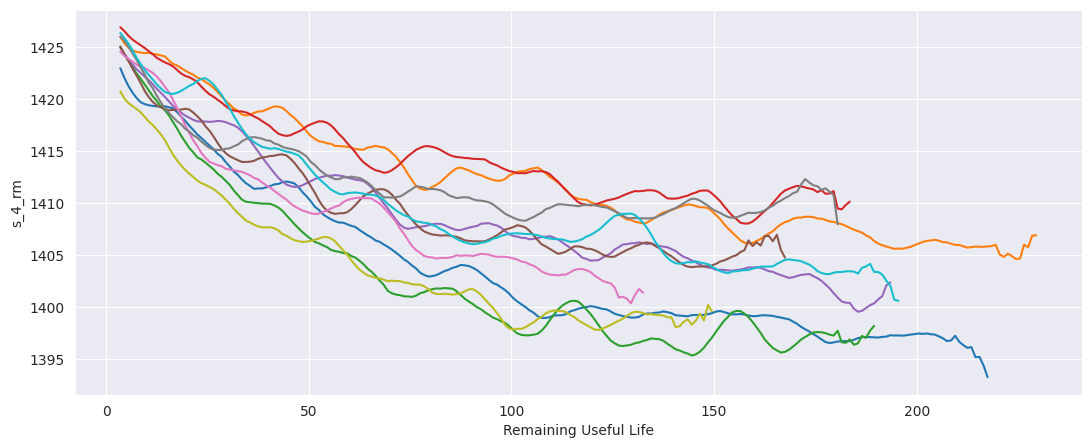

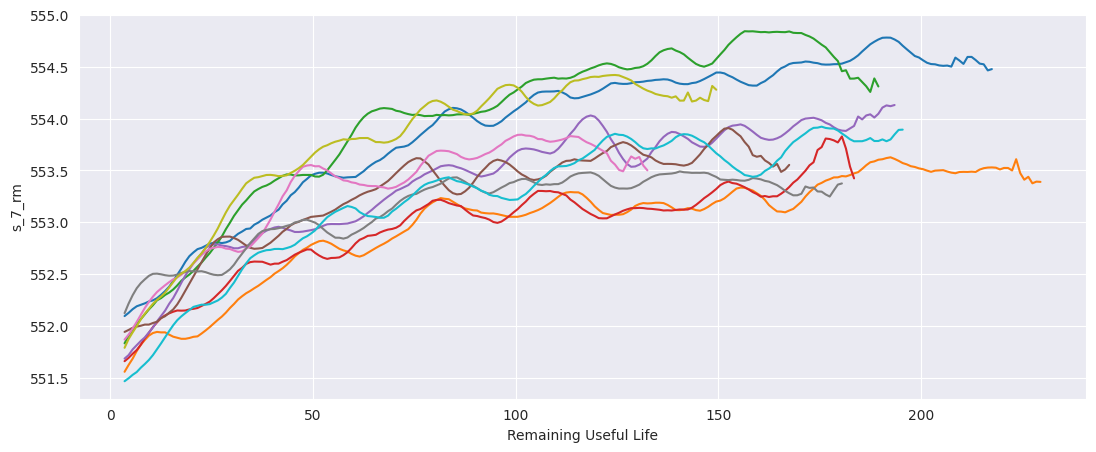

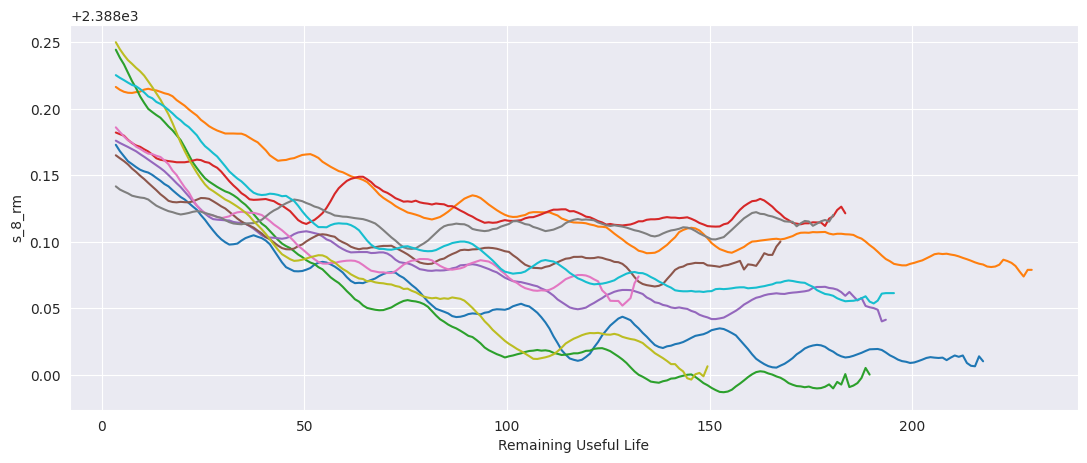

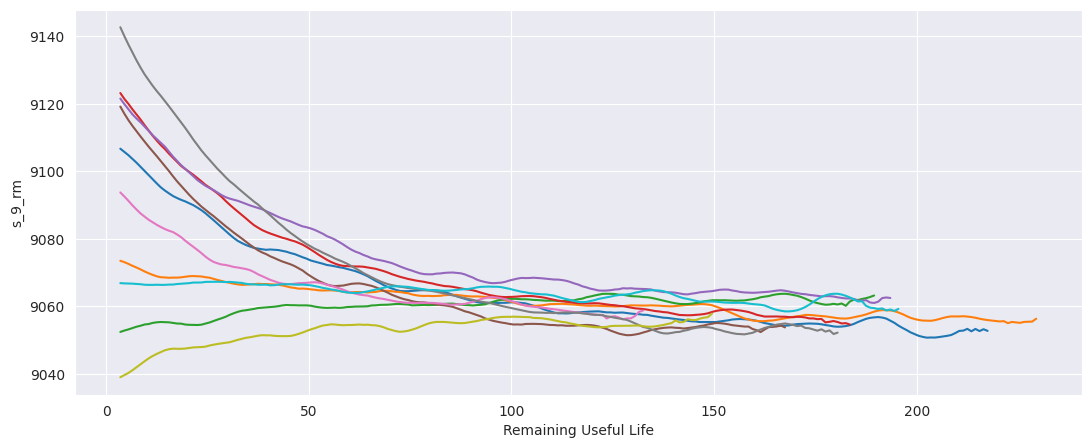

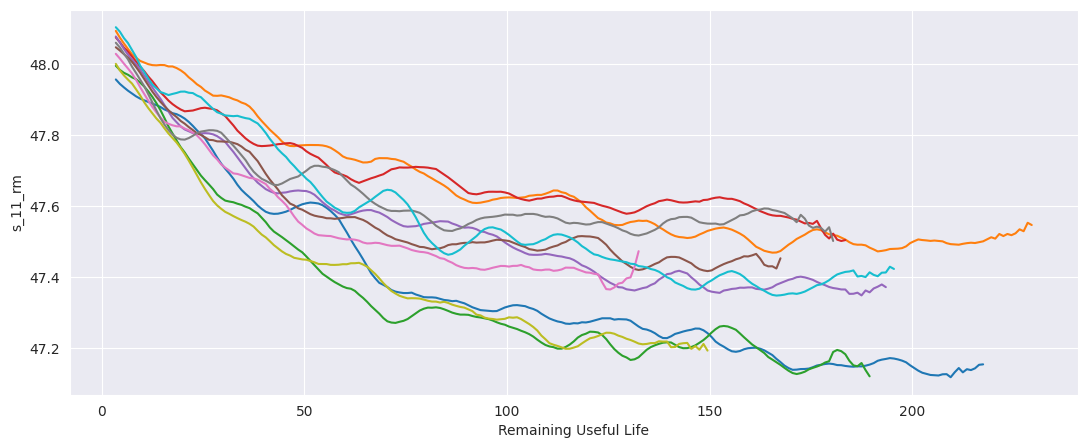

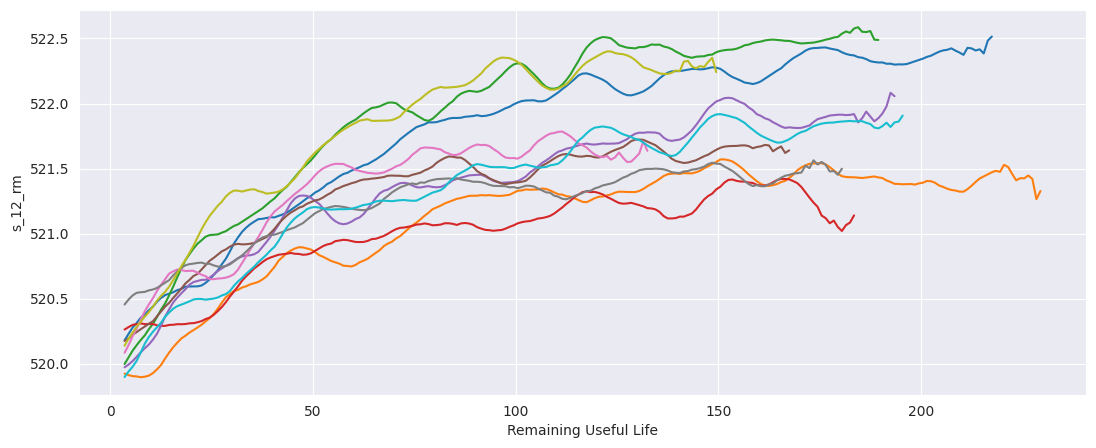

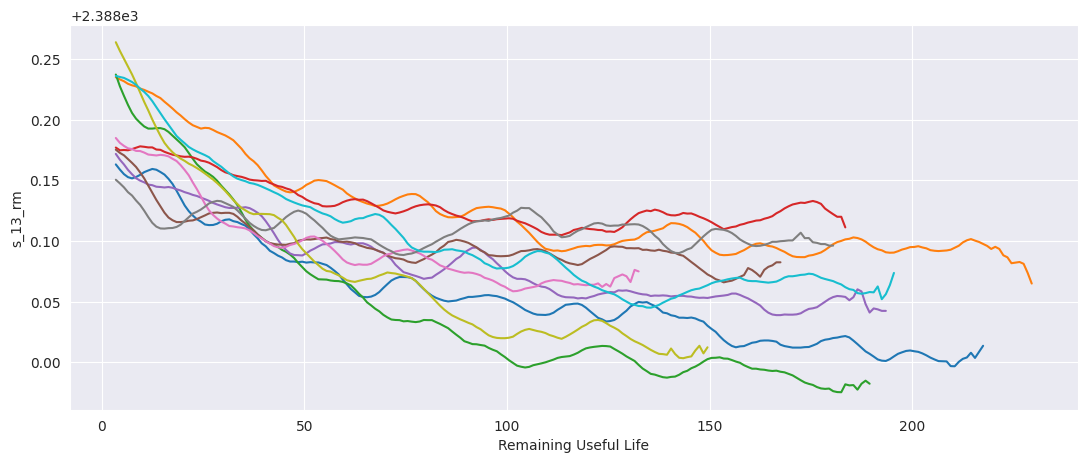

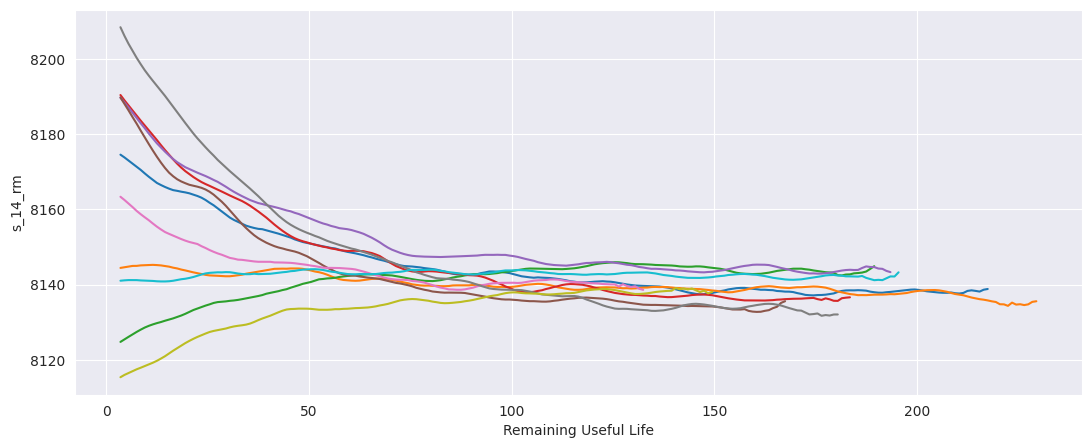

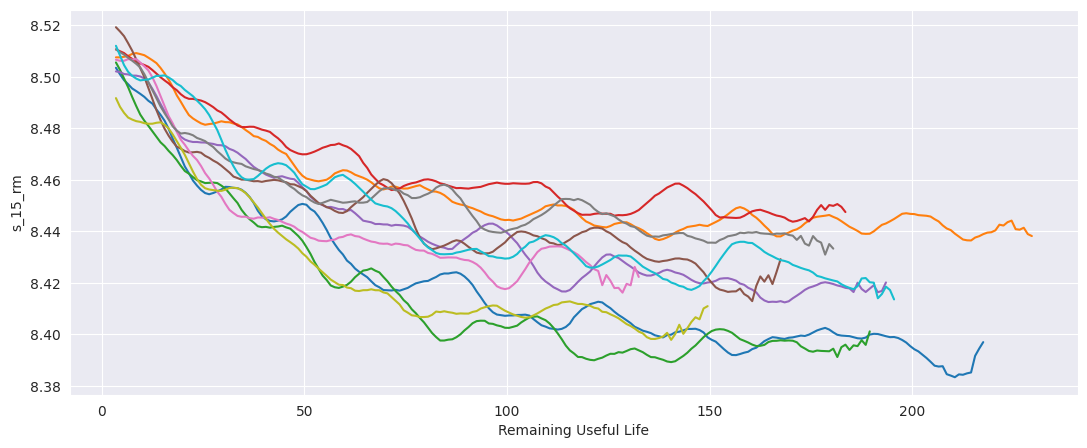

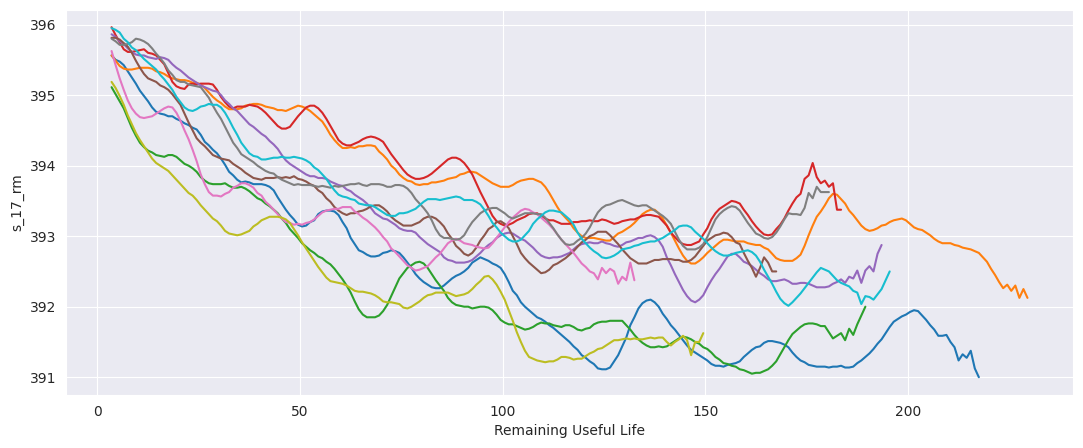

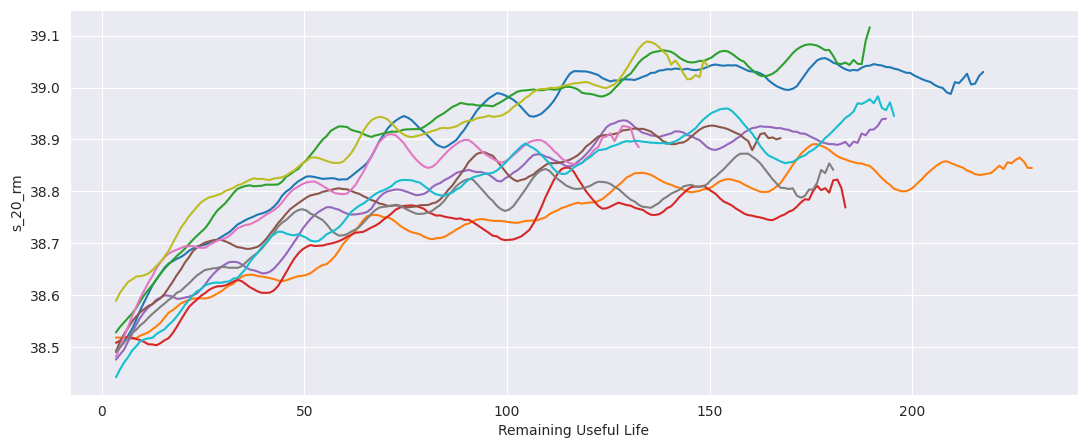

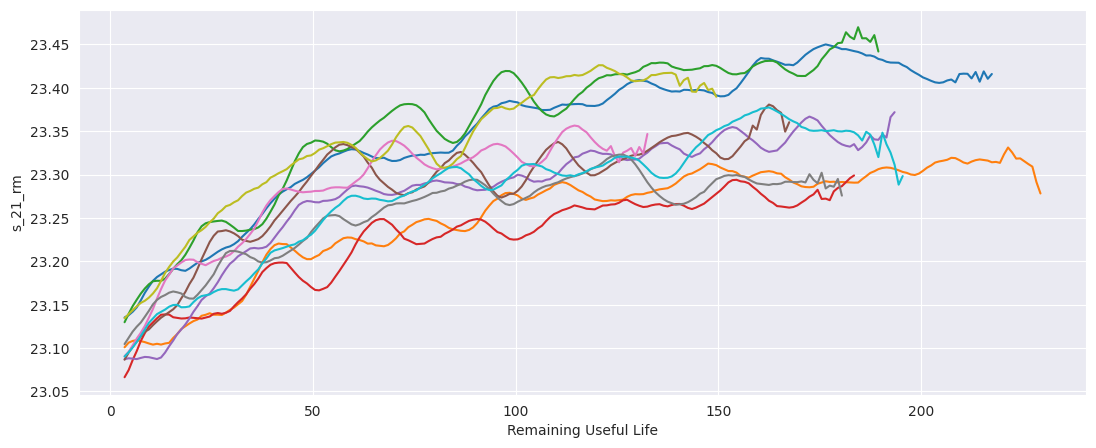

In [ ]:
for i in range(1,22):
     if i not in [1,5,6,10,16,18,19] :
        try:
            plot_signal(dftm, 's_'+str(i)+'_rm')
        except:
            pass

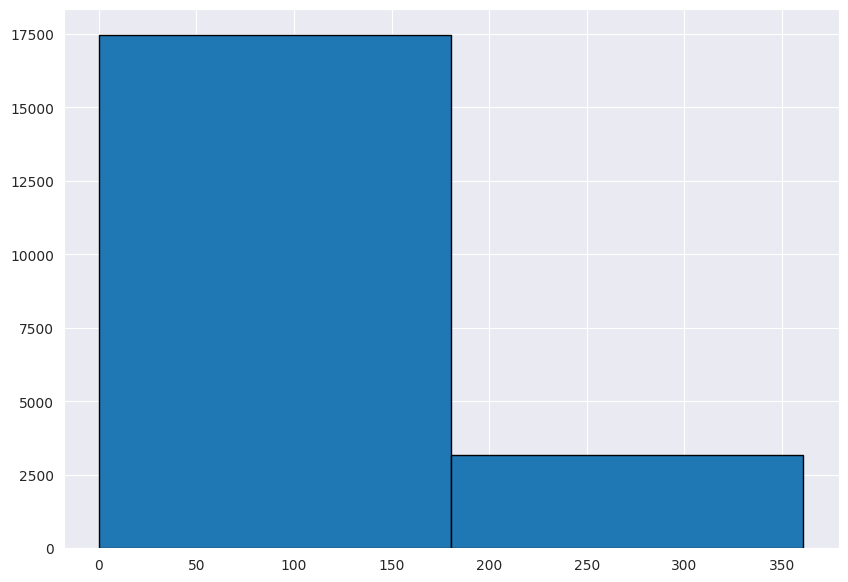

(array([17462.,  3169.]), array([  0. , 180.5, 361. ]), <BarContainer object of 2 artists>)


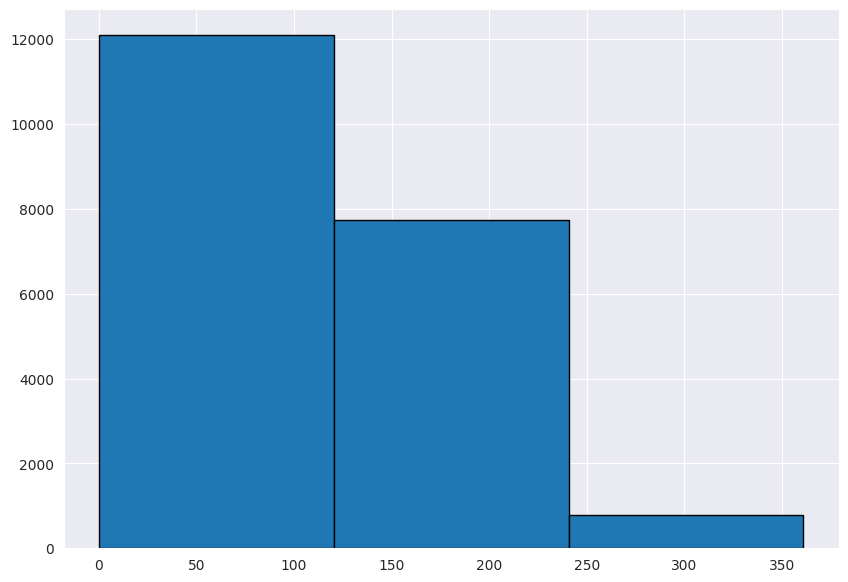

(array([12100.,  7735.,   796.]), array([  0.        , 120.33333333, 240.66666667, 361.        ]), <BarContainer object of 3 artists>)


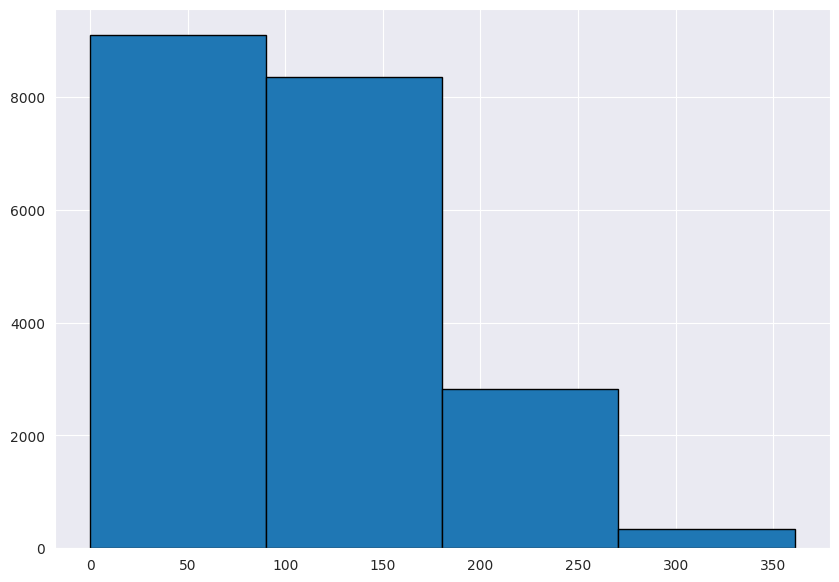

(array([9100., 8362., 2823.,  346.]), array([  0.  ,  90.25, 180.5 , 270.75, 361.  ]), <BarContainer object of 4 artists>)


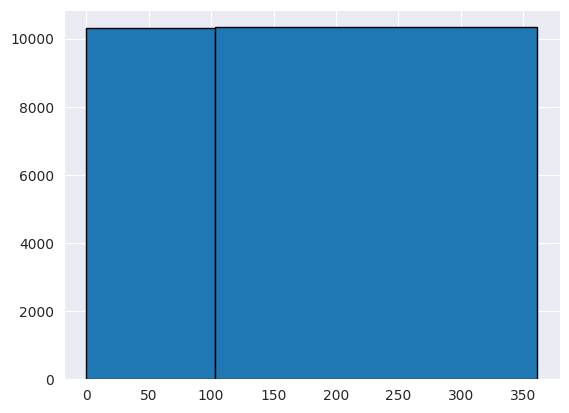

[  0. 103. 361.]


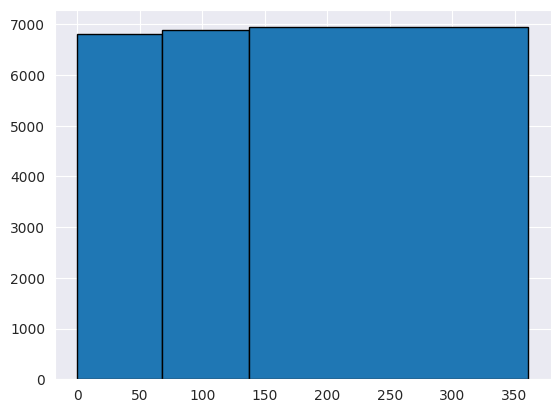

[  0.  68. 137. 361.]


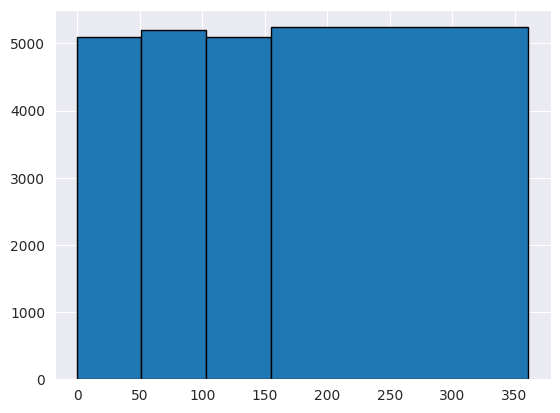

[  0.  51. 103. 155. 361.]


In [ ]:
#-- fixing bins width -----
# Creating histogram of 2 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 2, edgecolor='black')
# Show plot
plt.show()
print(m)

# Creating histogram of 3 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 3, edgecolor='black')
# Show plot
plt.show()
print(m)

# Creating histogram of 4 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 4, edgecolor='black')
# Show plot
plt.show()
print(m)



#-- fixing bins height -----

l=len(list(train['RUL']))
k=l/4

#define function to calculate equal-frequency bins, bins=2
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 2), edgecolor='black')
plt.show()
print(bins)

#define function to calculate equal-frequency bins, bins=3
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 3), edgecolor='black')
plt.show()
print(bins)


#define function to calculate equal-frequency bins, bins=4
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 4), edgecolor='black')
plt.show()
print(bins)

In [ ]:
y_train_tm

12276     30
8157      80
11666    103
12639    124
5278      30
        ... 
11284    107
11964    162
5390      74
860      195
15795    157
Name: RUL, Length: 13410, dtype: int64

In [ ]:
label_map={1:"RISK ZONE",2:"MODERATED RISK",3:"NO RISK"}

y=[]

#--Transforming rul values to classes :
for k in dftm['RUL']:
    if k<=68:
        y.append(1)
    elif k>69 and k<=137:
        y.append(2)
    else:
        y.append(3)
X_train_tm_c, X_test_tm_c, y_train_tm_c, y_test_tm_c=train_test_split(dftm.drop(columns=['unit_number','RUL']),np.array(y), test_size=0.35, stratify=np.array(y))
X_train_tm_cs=scaler.fit_transform(X_train_tm_c)
X_test_tm_cs=scaler.fit_transform(X_test_tm_c)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true)))

In [ ]:
# Fit du  Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 1)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [ ]:
y_valid_c=[]
for k in y_valid['RUL']:
    if k<=68:
        y_valid_c.append(1)
    elif k>69 and k<=137:
        y_valid_c.append(2)
    else:
        y_valid_c.append(3)

y_valid_c=np.array(y_valid_c)

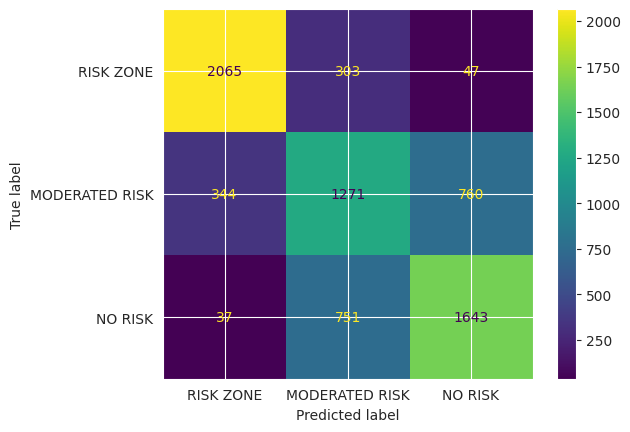

SVM
Accuracy score of training 0.685
Error rate of training 0.176
Accuracy score of test 0.690
Error rate of test 0.170
              precision    recall  f1-score   support

           1       0.84      0.86      0.85      2415
           2       0.55      0.54      0.54      2375
           3       0.67      0.68      0.67      2431

    accuracy                           0.69      7221
   macro avg       0.69      0.69      0.69      7221
weighted avg       0.69      0.69      0.69      7221



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

classifier.fit(X_train_tm_cs,np.array(y_train_tm_c))
y_svc_train=classifier.predict(X_train_tm_cs)

y_svc_test=classifier.predict(X_test_tm_cs)


cm= confusion_matrix(y_test_tm_c, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('SVM')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train_tm_c, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_svc_test))
print(metrics.classification_report(y_test_tm_c,y_svc_test))

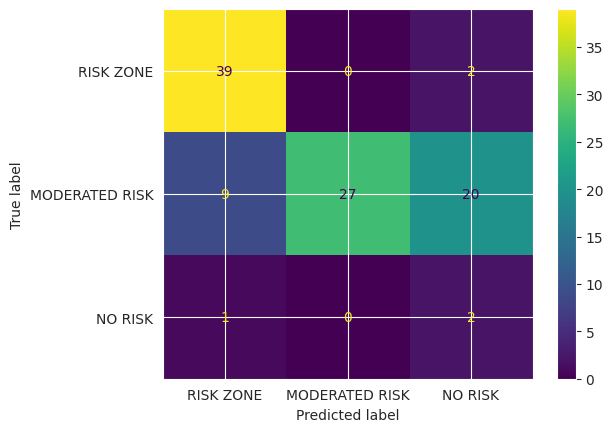

SVM
Accuracy score of validation 0.680
Error rate of validation 0.192


In [ ]:
y_svc_valid=classifier.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_svc_valid, labels=classifier.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()
print('SVM')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c,  y_svc_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c, y_svc_valid))
print(metrics.classification_report(y_valid_c,  y_svc_valid))

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5)

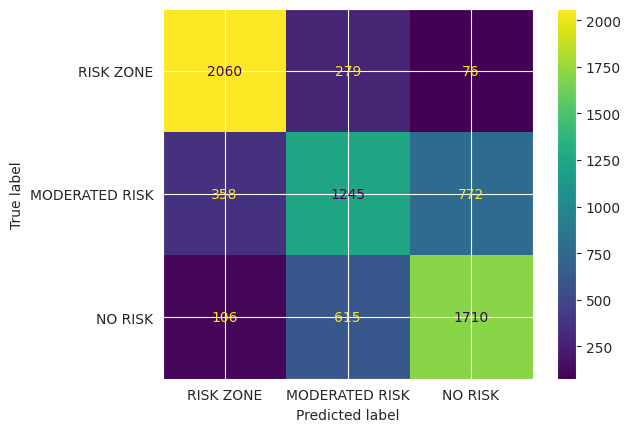

Random Forest Classifier


NameError: name 'metrics' is not defined

In [ ]:
clf.fit(X_train_tm_cs,np.array(y_train_tm_c))
y_rfc_train=clf.predict(X_train_tm_cs)
y_rfc_test=clf.predict(X_test_tm_cs)
cm= confusion_matrix(y_test_tm_c, y_rfc_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('Random Forest Classifier')
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_train_tm_c, y_rfc_train))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_rfc_train))

print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_rfc_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_rfc_test))

print(metrics.classification_report(y_test_tm_c,y_rfc_test))

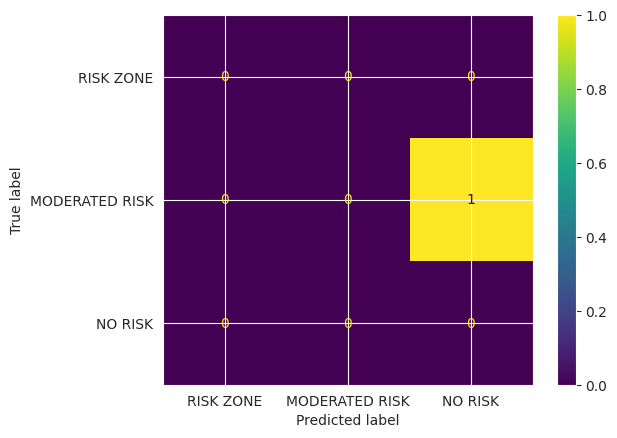

Random Forest Classifier


NameError: name 'metrics' is not defined

In [ ]:
y_rfc_valid=clf.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_rfc_valid, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])
disp.plot()
plt.show()
print('Random Forest Classifier')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_rfc_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_rfc_valid))
print(metrics.classification_report(y_valid_c,y_rfc_valid))

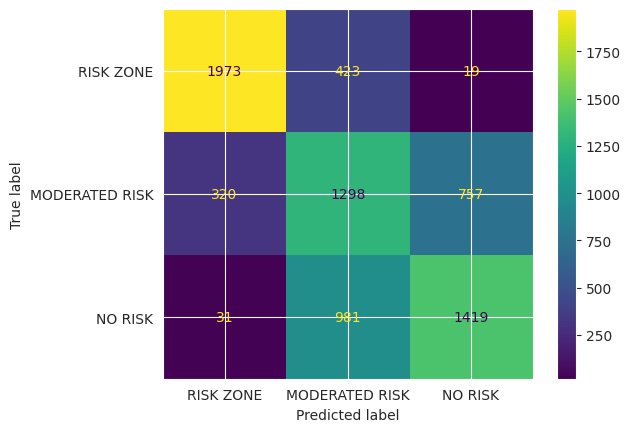

Guassian Naive Bayes
Accuracy score of train 0.634
Error rate of train 0.198
Accuracy score of test 0.649
Error rate of test 0.187
              precision    recall  f1-score   support

           1       0.85      0.82      0.83      2415
           2       0.48      0.55      0.51      2375
           3       0.65      0.58      0.61      2431

    accuracy                           0.65      7221
   macro avg       0.66      0.65      0.65      7221
weighted avg       0.66      0.65      0.65      7221



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_tm_cs,np.array(y_train_tm_c))

y_gnb_test= gnb.predict(X_test_tm_cs)
y_gnb_train= gnb.predict(X_train_tm_cs)


cm= confusion_matrix(y_test_tm_c, y_gnb_test, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[gnb.classes_[0]],label_map[gnb.classes_[1]],label_map[gnb.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('Guassian Naive Bayes')
print("Accuracy score of train %.3f" %metrics.accuracy_score(y_train_tm_c, y_gnb_train))
print("Error rate of train %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_gnb_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_gnb_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_gnb_test))

print(metrics.classification_report(y_test_tm_c,y_gnb_test))

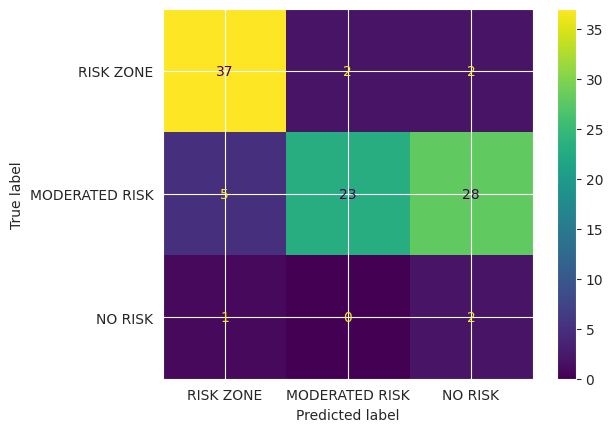

Random Forest Classifier
Accuracy score of validation 0.620
Error rate of validation 0.232
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        41
           2       0.92      0.41      0.57        56
           3       0.06      0.67      0.11         3

    accuracy                           0.62       100
   macro avg       0.61      0.66      0.52       100
weighted avg       0.87      0.62      0.68       100



In [ ]:
y_gnb_valid=gnb.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_gnb_valid, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[gnb.classes_[0]],label_map[gnb.classes_[1]],label_map[gnb.classes_[2]]])
disp.plot()
plt.show()
print('Random Forest Classifier')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_gnb_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_gnb_valid))
print(metrics.classification_report(y_valid_c,y_gnb_valid))

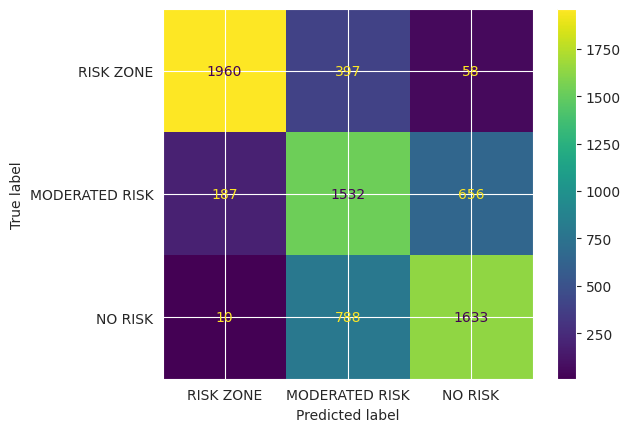

KNN
Accuracy score of train 0.721
Error rate of train 0.167
Accuracy score of test 0.710
Error rate of test 0.167
              precision    recall  f1-score   support

           1       0.91      0.81      0.86      2415
           2       0.56      0.65      0.60      2375
           3       0.70      0.67      0.68      2431

    accuracy                           0.71      7221
   macro avg       0.72      0.71      0.71      7221
weighted avg       0.72      0.71      0.71      7221



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_tm_cs,np.array(y_train_tm_c))

y_knn_test= knn.predict(X_test_tm_cs)
y_knn_train= knn.predict(X_train_tm_cs)

cm= confusion_matrix(y_test_tm_c, y_knn_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[knn.classes_[0]],label_map[knn.classes_[1]],label_map[knn.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('KNN')
print("Accuracy score of train %.3f" %metrics.accuracy_score(y_train_tm_c, y_knn_train))
print("Error rate of train %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_knn_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_knn_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_knn_test))

print(metrics.classification_report(y_test_tm_c,y_knn_test))

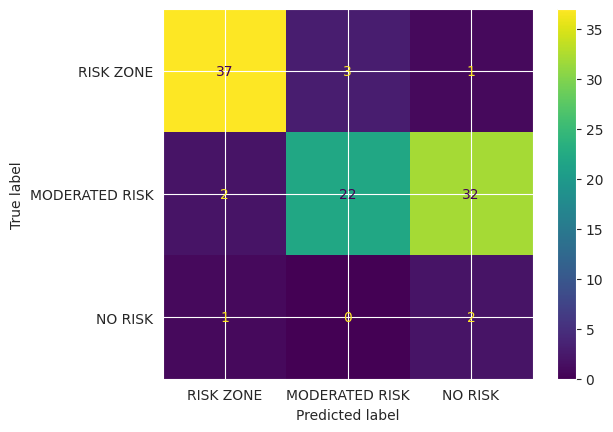

KNN
Accuracy score of validation 0.610
Error rate of validation 0.227
              precision    recall  f1-score   support

           1       0.93      0.90      0.91        41
           2       0.88      0.39      0.54        56
           3       0.06      0.67      0.11         3

    accuracy                           0.61       100
   macro avg       0.62      0.65      0.52       100
weighted avg       0.87      0.61      0.68       100



In [ ]:
y_knn_valid=knn.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_knn_valid, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[knn.classes_[0]],label_map[knn.classes_[1]],label_map[knn.classes_[2]]])
disp.plot()
plt.show()
print('KNN')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_knn_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_knn_valid))
print(metrics.classification_report(y_valid_c,y_knn_valid))

In [ ]:
def transform_to_classes(d):
    y=[]
    for k in d:
        if k<=68:
            y.append(1)
        elif k>69 and k<=137:
            y.append(2)
        else:
            y.append(3)
    return y

Index du train :  [    0     1     2 ... 20627 20628 20629] 

Index de test :  [    3    11    17 ... 20597 20606 20630]


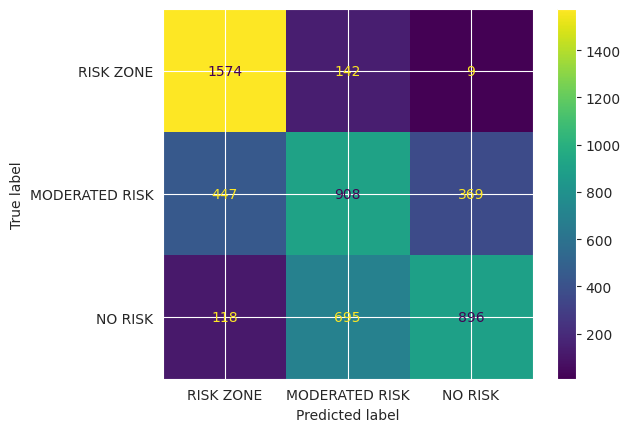

SVM
Accuracy score of training 0.689
Error rate of training 0.174
Accuracy score of test 0.655
Error rate of test 0.170
              precision    recall  f1-score   support

           1       0.74      0.91      0.81      1725
           2       0.52      0.53      0.52      1724
           3       0.70      0.52      0.60      1709

    accuracy                           0.65      5158
   macro avg       0.65      0.65      0.65      5158
weighted avg       0.65      0.65      0.65      5158

Index du train :  [    0     3     4 ... 20627 20628 20630] 

Index de test :  [    1     2     6 ... 20625 20626 20629]


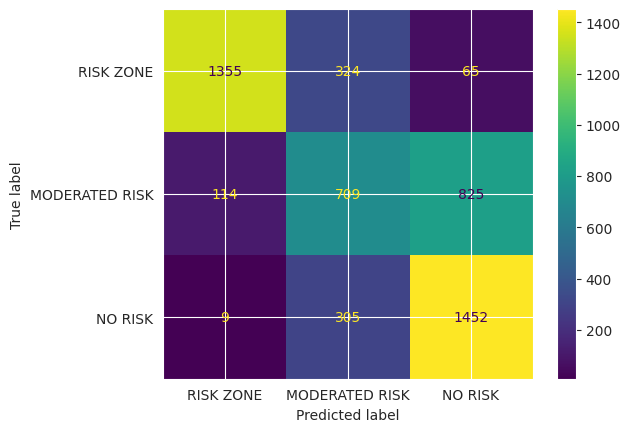

SVM
Accuracy score of training 0.688
Error rate of training 0.174
Accuracy score of test 0.682
Error rate of test 0.200
              precision    recall  f1-score   support

           1       0.92      0.78      0.84      1744
           2       0.53      0.43      0.47      1648
           3       0.62      0.82      0.71      1766

    accuracy                           0.68      5158
   macro avg       0.69      0.68      0.67      5158
weighted avg       0.69      0.68      0.68      5158

Index du train :  [    1     2     3 ... 20628 20629 20630] 

Index de test :  [    0    14    18 ... 20619 20622 20624]


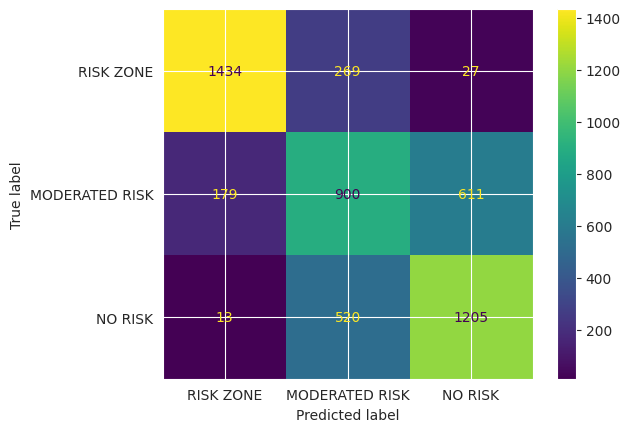

SVM
Accuracy score of training 0.689
Error rate of training 0.174
Accuracy score of test 0.686
Error rate of test 0.174
              precision    recall  f1-score   support

           1       0.88      0.83      0.85      1730
           2       0.53      0.53      0.53      1690
           3       0.65      0.69      0.67      1738

    accuracy                           0.69      5158
   macro avg       0.69      0.68      0.69      5158
weighted avg       0.69      0.69      0.69      5158

Index du train :  [    0     1     2 ... 20626 20629 20630] 

Index de test :  [    4     5     7 ... 20623 20627 20628]


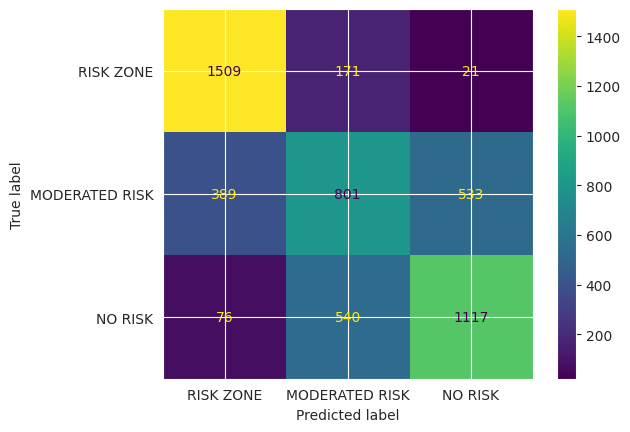

SVM
Accuracy score of training 0.688
Error rate of training 0.175
Accuracy score of test 0.665
Error rate of test 0.175
              precision    recall  f1-score   support

           1       0.76      0.89      0.82      1701
           2       0.53      0.46      0.50      1723
           3       0.67      0.64      0.66      1733

    accuracy                           0.66      5157
   macro avg       0.65      0.67      0.66      5157
weighted avg       0.65      0.66      0.66      5157



In [ ]:
from sklearn.model_selection import KFold
train_tm_cv=dftm.drop(columns=['unit_number','RUL']).copy()
y=dftm['RUL']
cv = KFold(n_splits=4, shuffle=True)
for train_index, test_index in cv.split(train_tm) :
    print("Index du train : ", train_index, "\n")
    print("Index de test : ", test_index)
    X_train, X_test, y_train, y_test = train_tm_cv.iloc[train_index,:], train_tm_cv.iloc[test_index,:],np.array(transform_to_classes(y[train_index])), np.array(transform_to_classes(y[test_index]))
    classifier.fit(scaler.fit_transform(X_train), y_train)
    y_svc_train=classifier.predict(scaler.fit_transform(X_train))

    y_svc_test=classifier.predict(scaler.fit_transform(X_test))


    cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
    disp.plot()
    plt.show()

    # Measure the performance
    print('SVM')
    print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
    print("Error rate of training %.3f" %mean_absolute_percentage_error(y_train,y_svc_train))
    print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
    print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test,y_svc_test))
    print(metrics.classification_report(y_test,y_svc_test))

In [ ]:
#let's save our regression model and build an API around it
import pickle

model_pkl_file = "RUL_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(regressor, file)

model_scaler_pkl_file = "RUL_model_scaler.pkl"

with open(model_scaler_pkl_file, 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
regressor.predict(scaler.fit_transform(X_test))

In [ ]:
X_test.iloc[[0]]

In [ ]:
first_row = X_test.iloc[[0]]
json_data = first_row.to_dict(orient='records')[0]

print(json_data)

# THE END